<font size="6" color="purple"> **TALLER DE MÉTODOS ESTOCÁSTICOS - EJERCICIO 5 - Series de Tiempo A.**

**Escala de Análisis Diaria**


*   ALUMNO: EDWIN GILBERTO AMAYA REYES
*   PROFESOR LEONARDO DAVID DONADO GARZÓN

<font size="5.5" >  **GENERALIDADES**

Para la serie de caudales medios diarios del Río Lebrija (archivo adjunto) se le pide:

<font size="5"> **1. Conservar la serie en escala diaria**

In [54]:
import pandas as pd

# Cargar los datos
df = pd.read_csv(r'J:\My Drive\1_Maestria_en_recursos_Hidraulicos\Tercer_Semestre\Metodos_Estocasticos\Trabajos\T5_Series de Tiempo 1\SMWR_Lebrija.csv')

# Convertir la columna de fecha a formato de fecha
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%m/%d/%Y')

# Calcular el caudal medio diario y resetear el índice
Serie_Diaria = df.groupby('Fecha')['Caudal m3/s'].mean().reset_index()

# Redondear los valores de 'Caudal m3/s' a dos cifras significativas
Serie_Diaria['Caudal m3/s'] = Serie_Diaria['Caudal m3/s'].round(2)



<font size="5"> **2. Realizar la estimación de los estadísticos o momentos de la serie en escala diaria**

<font size="5.0"> &emsp; **a. Media**

In [55]:
import pandas as pd

# Calcular la media
media = Serie_Diaria['Caudal m3/s'].mean()

# Redondear a dos cifras significativas
media_redondeada = round(media, 2)

print(f"La media del Caudal diario en el rio Lebríja es {media_redondeada} m³/s")

La media del Caudal diario en el rio Lebríja es 93.78 m³/s


<font size="5"> &emsp; **b. Varianza y desviación estándar**

In [56]:
import pandas as pd


# Calcular la varianza considerando un grado de libertad
varianza = Serie_Diaria['Caudal m3/s'].var(ddof=1) 

# Calcular la desviación estándar considerando un grado de libertad
desviacion_estandar = Serie_Diaria['Caudal m3/s'].std(ddof=1)

# Redondear a dos cifras significativas
desviacion_estandar_red = round(desviacion_estandar, 2)
varianza_redondeada = round(varianza, 2)

print(f"La varianza del Caudal diario es {varianza_redondeada} m⁶/s²")
print(f"La desviación estándar del Caudal diario en el rio Lebríja es {desviacion_estandar_red} m³/s")


La varianza del Caudal diario es 5327.78 m⁶/s²
La desviación estándar del Caudal diario en el rio Lebríja es 72.99 m³/s


<font size="5"> &emsp; **c. Coeficiente de Variación**

In [57]:
import pandas as pd


# Calcular la media
media = Serie_Diaria['Caudal m3/s'].mean()

# Calcular la desviación estándar considerando un grado de libertad
desviacion_estandar = Serie_Diaria['Caudal m3/s'].std(ddof=1)

# Calcular el coeficiente de variación
coeficiente_variacion = (desviacion_estandar / media) 

# Redondear a dos cifras significativas
coeficiente_variacion_redondeado = round(coeficiente_variacion, 2)

print(f"El coeficiente de variación del Caudal diario en el rio Lebríja es {coeficiente_variacion_redondeado}")


El coeficiente de variación del Caudal diario en el rio Lebríja es 0.78


<font size="5"> &emsp; **d. Coeficiente de Asimetría**

In [58]:
import pandas as pd


# Calcular el coeficiente de asimetría
asimetria = Serie_Diaria['Caudal m3/s'].skew()

# Redondear a dos cifras significativas
asimetria_redondeada = round(asimetria, 2)

print(f"El coeficiente de asimetría del caudal diario en el rio Lebríja es {asimetria_redondeada}")


El coeficiente de asimetría del caudal diario en el rio Lebríja es 2.02


<font size="5"> &emsp; **e. Coeficiente de Curtosis**

In [59]:
import pandas as pd

# Calcular el coeficiente de curtosis
curtosis = Serie_Diaria['Caudal m3/s'].kurt()

# Redondear a dos cifras significativas
curtosis_redondeada = round(curtosis, 2)

print(f"El coeficiente de curtosis del caudal diario en el rio Lebríja es {curtosis_redondeada}")


El coeficiente de curtosis del caudal diario en el rio Lebríja es 4.66


<font size="5"> &emsp; **f. Covarianza y Correlación**

In [60]:
import pandas as pd


# Calcular la varianza (que es la covarianza de la variable consigo misma)
varianza = Serie_Diaria['Caudal m3/s'].var(ddof=1)

# Redondear a dos cifras significativas
varianza_redondeada = round(varianza, 2)

print(f"La varianza (o covarianza con sí misma) del del caudal diario en el rio Lebríja es {varianza_redondeada} m⁶/s²")

# La correlación de una variable consigo misma siempre es 1
print("La correlación del campo 'Caudal m3/s' del caudal diario en el rio Lebríja es 1")


La varianza (o covarianza con sí misma) del del caudal diario en el rio Lebríja es 5327.78 m⁶/s²
La correlación del campo 'Caudal m3/s' del caudal diario en el rio Lebríja es 1


<font size="5"> &emsp; **g. Autocorrelación (ACF) y Autocorrelación parcial (PACF)**

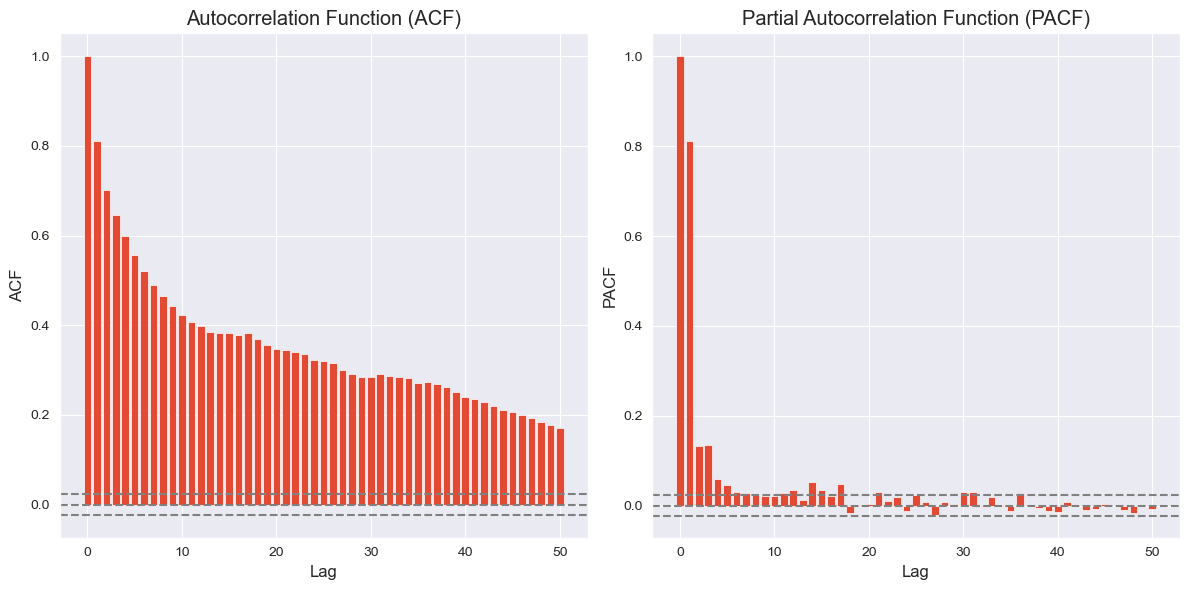

In [61]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt

# Cargar el dataframe
Serie_Diaria = pd.read_csv('J:/My Drive/1_Maestria_en_recursos_Hidraulicos/Tercer_Semestre/Metodos_Estocasticos/Trabajos/T5_Series de Tiempo 1/SMWR_Lebrija.csv')

# Eliminar los valores nulos
Serie_Diaria = Serie_Diaria.dropna(subset=['Caudal m3/s'])

# Calcular la ACF y PACF
acf_values = acf(Serie_Diaria['Caudal m3/s'], nlags=50)
pacf_values = pacf(Serie_Diaria['Caudal m3/s'], nlags=50)

# Crear los gráficos
plt.figure(figsize=(12,6))

plt.subplot(121)
plt.bar(range(len(acf_values)), acf_values)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Serie_Diaria['Caudal m3/s'])), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(Serie_Diaria['Caudal m3/s'])), linestyle='--', color='gray')
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')  # Etiqueta para el eje x
plt.ylabel('ACF')  # Etiqueta para el eje y

plt.subplot(122)
plt.bar(range(len(pacf_values)), pacf_values)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Serie_Diaria['Caudal m3/s'])), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(Serie_Diaria['Caudal m3/s'])), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')  # Etiqueta para el eje x
plt.ylabel('PACF')  # Etiqueta para el eje y

plt.tight_layout()
plt.show()




<font size="5"> &emsp; **h. La función de densidad espectral (PSD)**

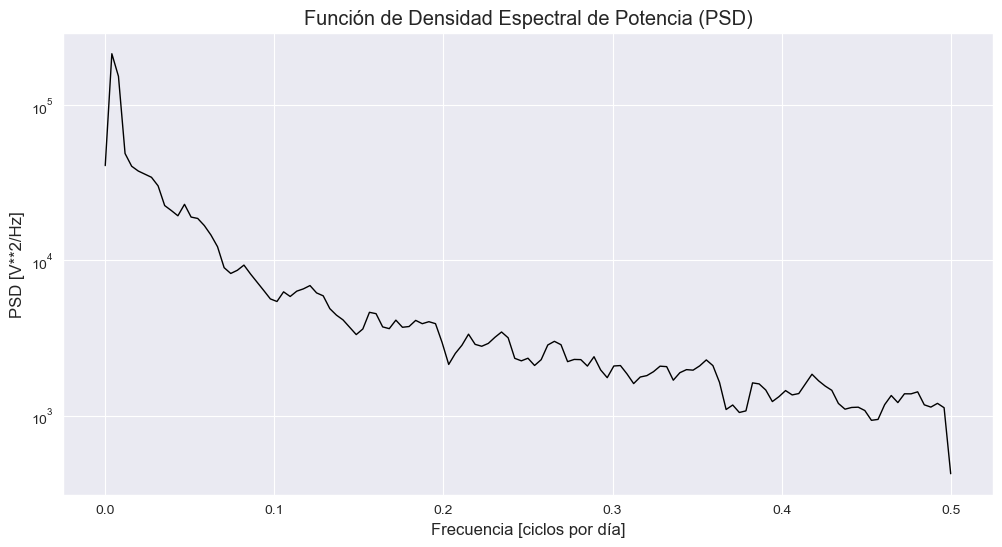

In [62]:
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt

# Leemos los datos desde el archivo CSV
df = pd.read_csv(r'J:\My Drive\1_Maestria_en_recursos_Hidraulicos\Tercer_Semestre\Metodos_Estocasticos\Trabajos\T5_Series de Tiempo 1\SMWR_Lebrija.csv', parse_dates=['Fecha'], dayfirst=False)

# Extraemos la columna 'Caudal m3/s' y eliminamos las filas vacías
datos = df['Caudal m3/s'].dropna()

# Calculamos la PSD
f, Pxx_den = signal.welch(datos)

# Creamos una nueva figura con un ancho y alto específicos
plt.figure(figsize=(12, 6))  # puedes ajustar estos valores según tus necesidades

# Creamos el gráfico con una línea continua de color negro y un espesor de línea de 1
plt.semilogy(f, Pxx_den, 'k-', linewidth=1)

# Añadimos el título y las etiquetas
plt.title('Función de Densidad Espectral de Potencia (PSD)')
plt.xlabel('Frecuencia [ciclos por día]')
plt.ylabel('PSD [V**2/Hz]')

# Mostramos el gráfico
plt.show()





<font size="5"> **3. Graficar:**

<font size="5.0"> &emsp; **a. Serie de tiempo a escala diaria**

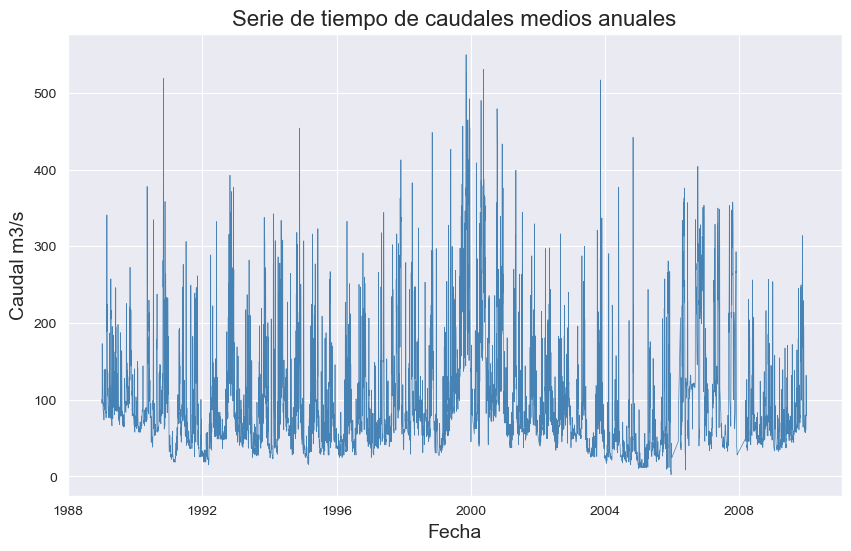

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Lee el archivo CSV
Serie_Diaria = pd.read_csv(r'J:\My Drive\1_Maestria_en_recursos_Hidraulicos\Tercer_Semestre\Metodos_Estocasticos\Trabajos\T5_Series de Tiempo 1\SMWR_Lebrija.csv')

# Asegúrate de que los datos estén en formato numérico
Serie_Diaria['Caudal m3/s'] = pd.to_numeric(Serie_Diaria['Caudal m3/s'], errors='coerce')

# Elimina las filas con valores NaN
Serie_Diaria = Serie_Diaria.dropna(subset=['Caudal m3/s'])

# Convertir la columna 'Fecha' al formato datetime
Serie_Diaria['Fecha'] = pd.to_datetime(Serie_Diaria['Fecha'])

# Establecer el estilo del gráfico
sns.set_style("darkgrid")

# Crear el gráfico
plt.figure(figsize=(10,6))
plt.plot(Serie_Diaria['Fecha'], Serie_Diaria['Caudal m3/s'], color='Steelblue', linewidth=0.5, label='Caudal m3/s')



# Añadir título y etiquetas para los ejes
plt.title('Serie de tiempo de caudales medios anuales', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Caudal m3/s', fontsize=14)

# Añadir una cuadrícula
plt.grid(True)

# Mostrar el gráfico
plt.show()

<font size="5.0"> &emsp; **b. El correlograma total**

<Figure size 1000x500 with 0 Axes>

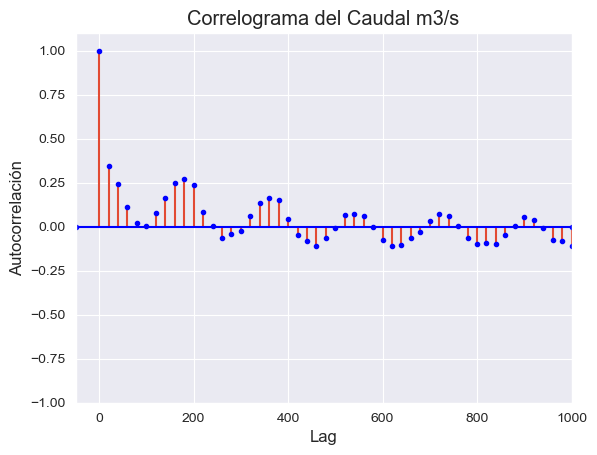

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Lee el archivo CSV
df = pd.read_csv(r'J:\My Drive\1_Maestria_en_recursos_Hidraulicos\Tercer_Semestre\Metodos_Estocasticos\Trabajos\T5_Series de Tiempo 1\SMWR_Lebrija.csv')

# Asegúrate de que los datos estén en formato numérico
df['Caudal m3/s'] = pd.to_numeric(df['Caudal m3/s'], errors='coerce')

# Elimina las filas con valores NaN
df = df.dropna(subset=['Caudal m3/s'])

# Ajusta el tamaño del gráfico
plt.figure(figsize=(10, 5))

# Crea el correlograma con más lags
plot = plot_acf(df['Caudal m3/s'], lags=range(0, 1001, 20), color='blue', alpha=None, marker='o', markersize=3)

# Cambia el color de las barras
for i in range(2, len(plot.lines)):
    plot.lines[i].set_color('black')

# Agrega las etiquetas a los ejes
plt.xlabel('Lag')
plt.ylabel('Autocorrelación')

# Ajusta los límites de los ejes
plt.xlim(-50, 1000)
plt.ylim(-1, 1.1)

# Ajusta el título del gráfico
plt.title('Correlograma del Caudal m3/s')

# Ajusta el estilo y el color del gráfico
plt.style.use('ggplot')
plt.grid(True)

# Muestra el gráfico
plt.show()


<font size="5.0"> &emsp; **c. El correlograma parcial**

<Figure size 1000x500 with 0 Axes>

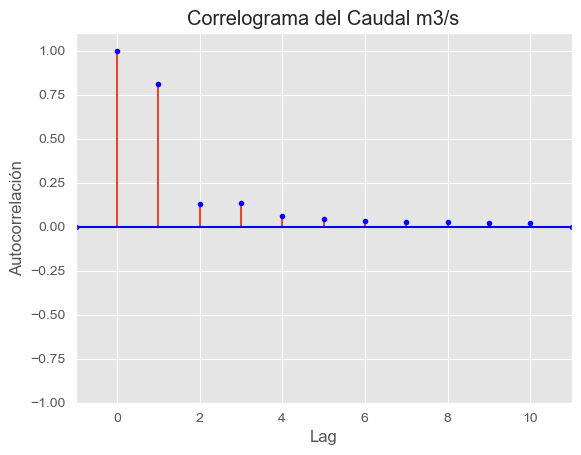

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# Lee el archivo CSV
df = pd.read_csv(r'J:\My Drive\1_Maestria_en_recursos_Hidraulicos\Tercer_Semestre\Metodos_Estocasticos\Trabajos\T5_Series de Tiempo 1\SMWR_Lebrija.csv')

# Asegúrate de que los datos estén en formato numérico
df['Caudal m3/s'] = pd.to_numeric(df['Caudal m3/s'], errors='coerce')

# Elimina las filas con valores NaN
df = df.dropna(subset=['Caudal m3/s'])

# Ajusta el tamaño del gráfico
plt.figure(figsize=(10, 5))

# Crea el correlograma con más lags
plot = plot_pacf(df['Caudal m3/s'], lags=range(0, 11, 1), color='blue', alpha=None, marker='o', markersize=3)

# Cambia el color de las barras
for i in range(2, len(plot.lines)):
    plot.lines[i].set_color('black')

# Agrega las etiquetas a los ejes
plt.xlabel('Lag')
plt.ylabel('Autocorrelación')

# Ajusta los límites de los ejes
plt.xlim(-1, 11)
plt.ylim(-1, 1.1)

# Ajusta el título del gráfico
plt.title('Correlograma del Caudal m3/s')

# Ajusta el estilo y el color del gráfico
plt.style.use('ggplot')
plt.grid(True)

# Muestra el gráfico
plt.show()



<font size="5.0"> &emsp; **d. La desviacion estándar**

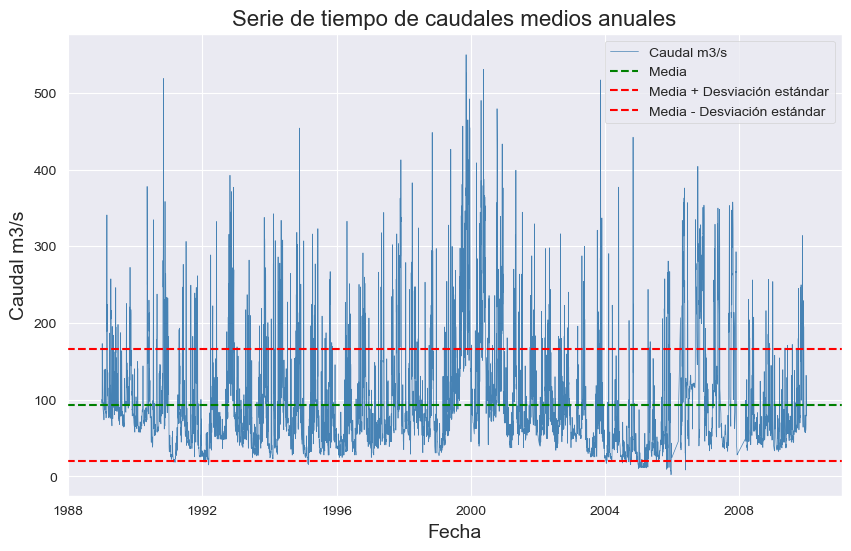

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Lee el archivo CSV
Serie_Diaria = pd.read_csv(r'J:\My Drive\1_Maestria_en_recursos_Hidraulicos\Tercer_Semestre\Metodos_Estocasticos\Trabajos\T5_Series de Tiempo 1\SMWR_Lebrija.csv')

# Asegúrate de que los datos estén en formato numérico
Serie_Diaria['Caudal m3/s'] = pd.to_numeric(Serie_Diaria['Caudal m3/s'], errors='coerce')

# Elimina las filas con valores NaN
Serie_Diaria = Serie_Diaria.dropna(subset=['Caudal m3/s'])

# Convertir la columna 'Fecha' al formato datetime
Serie_Diaria['Fecha'] = pd.to_datetime(Serie_Diaria['Fecha'])

# Calcular la media y la desviación estándar de los datos
mean = np.mean(Serie_Diaria['Caudal m3/s'])
std_dev = np.std(Serie_Diaria['Caudal m3/s'], ddof=1)

# Establecer el estilo del gráfico
sns.set_style("darkgrid")

# Crear el gráfico
plt.figure(figsize=(10,6))
plt.plot(Serie_Diaria['Fecha'], Serie_Diaria['Caudal m3/s'], color='Steelblue', linewidth=0.5, label='Caudal m3/s')

# Añadir la línea de la media
plt.axhline(y=mean, color='Green', linestyle='--', label='Media')

# Añadir las líneas de la media más/menos la desviación estándar
plt.axhline(y=mean + std_dev, color='Red', linestyle='--', label='Media + Desviación estándar')
plt.axhline(y=mean - std_dev, color='Red', linestyle='--', label='Media - Desviación estándar')

# Añadir la leyenda al gráfico
plt.legend(loc='upper right')

# Añadir título y etiquetas para los ejes
plt.title('Serie de tiempo de caudales medios anuales', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Caudal m3/s', fontsize=14)

# Añadir una cuadrícula
plt.grid(True)

# Mostrar el gráfico
plt.show()


<font size="5.0"> &emsp; **e. El coeficiente de asimetría**

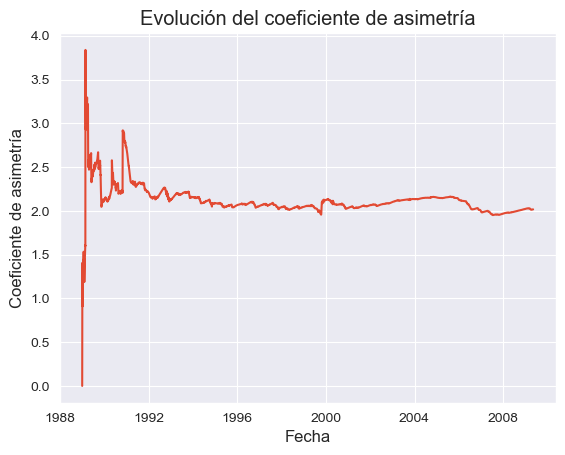

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Leemos los datos desde el archivo CSV
df = pd.read_csv(r'J:\My Drive\1_Maestria_en_recursos_Hidraulicos\Tercer_Semestre\Metodos_Estocasticos\Trabajos\T5_Series de Tiempo 1\SMWR_Lebrija.csv', parse_dates=['Fecha'], dayfirst=False)

# Extraemos la columna 'Caudal m3/s' y eliminamos las filas vacías
datos = df['Caudal m3/s'].dropna()

# Calculamos el coeficiente de asimetría para cada subconjunto de datos
asimetrias = [stats.skew(datos[:i]) for i in range(1, len(datos)+1)]

# Creamos el gráfico de línea
plt.plot(df['Fecha'][:len(datos)], asimetrias)

# Añadimos el título y las etiquetas
plt.title('Evolución del coeficiente de asimetría')
plt.xlabel('Fecha')
plt.ylabel('Coeficiente de asimetría')

# Mostramos el gráfico
plt.show()


<font size="5.0"> &emsp; **f. El coeficiente de curtosis**

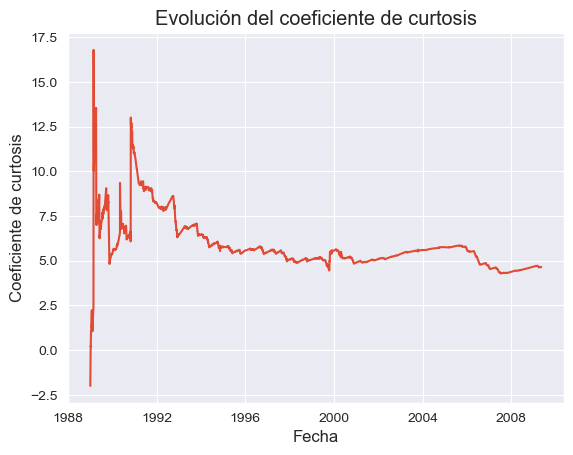

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Leemos los datos desde el archivo CSV
df = pd.read_csv(r'J:\My Drive\1_Maestria_en_recursos_Hidraulicos\Tercer_Semestre\Metodos_Estocasticos\Trabajos\T5_Series de Tiempo 1\SMWR_Lebrija.csv', parse_dates=['Fecha'], dayfirst=False)

# Extraemos la columna 'Caudal m3/s' y eliminamos las filas vacías
datos = df['Caudal m3/s'].dropna()

# Calculamos el coeficiente de curtosis para cada subconjunto de datos
curtosis = [stats.kurtosis(datos[:i]) for i in range(1, len(datos)+1)]

# Creamos el gráfico de línea
plt.plot(df['Fecha'][:len(datos)], curtosis)

# Añadimos el título y las etiquetas
plt.title('Evolución del coeficiente de curtosis')
plt.xlabel('Fecha')
plt.ylabel('Coeficiente de curtosis')

# Mostramos el gráfico
plt.show()


<font size="5.0"> &emsp; **g. El Periodograma**

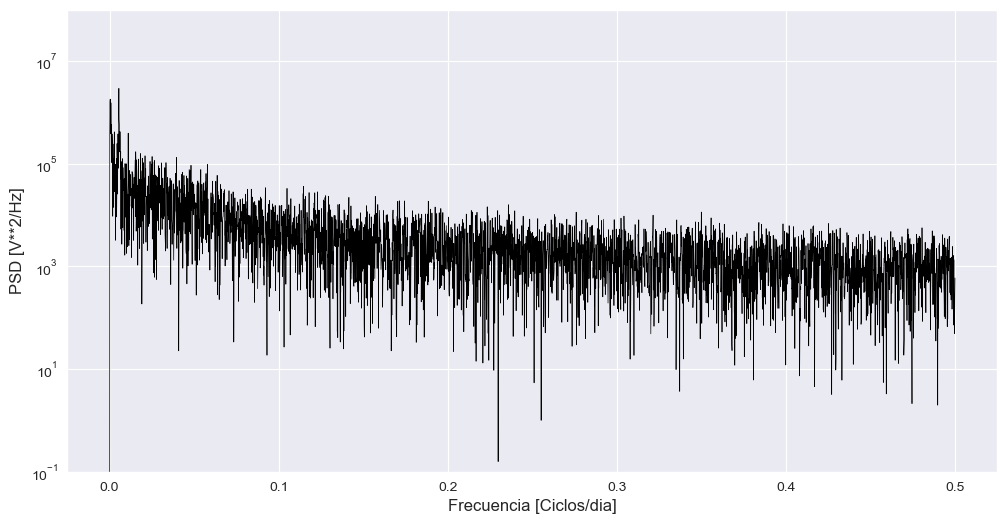

In [69]:
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt

# Leemos los datos desde el archivo CSV
df = pd.read_csv(r'J:\My Drive\1_Maestria_en_recursos_Hidraulicos\Tercer_Semestre\Metodos_Estocasticos\Trabajos\T5_Series de Tiempo 1\SMWR_Lebrija.csv', parse_dates=['Fecha'], dayfirst=False)

# Extraemos la columna 'Caudal m3/s' y eliminamos las filas vacías
datos = df['Caudal m3/s'].dropna()

# Calculamos el periodograma
f, Pxx_den = signal.periodogram(datos)

# Creamos una nueva figura con un ancho y alto específicos
plt.figure(figsize=(12, 6))  # puedes ajustar estos valores según tus necesidades

# Creamos el gráfico con una línea de puntos rojos
plt.semilogy(f, Pxx_den, 'k-', linewidth=0.5)
plt.ylim([1e-1, 1e8])
plt.xlabel('Frecuencia [Ciclos/dia]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()


# Mostramos el gráfico
plt.show()


<font size="5.0"> &emsp; **h. La curva IMF de la serie de tiempo diaria obtenida a partir del procedimiento EMD**

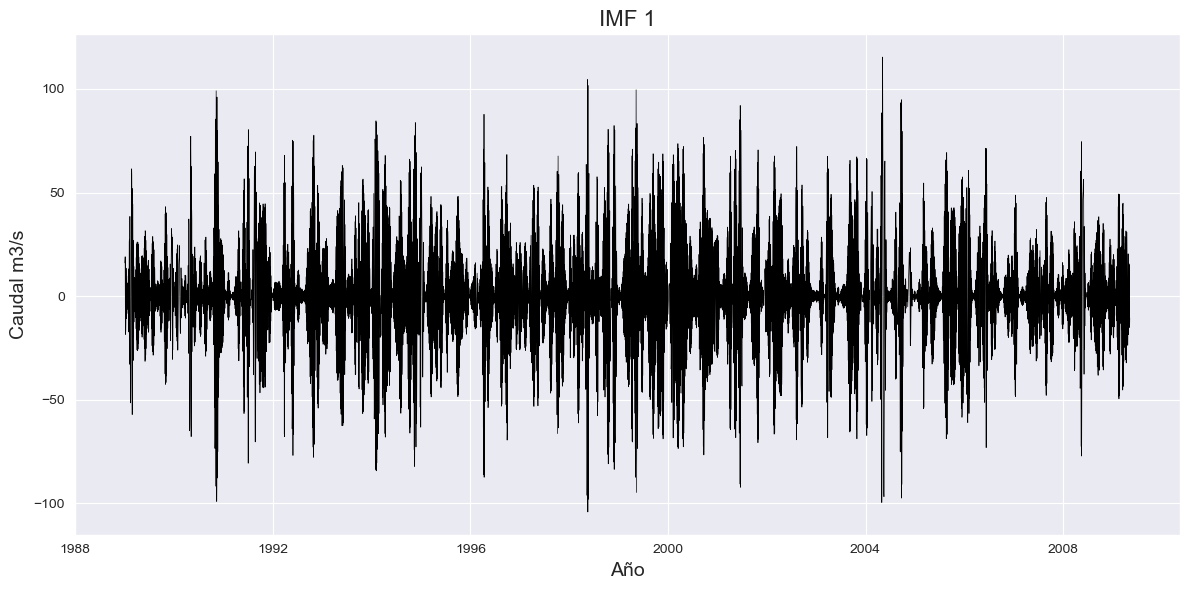

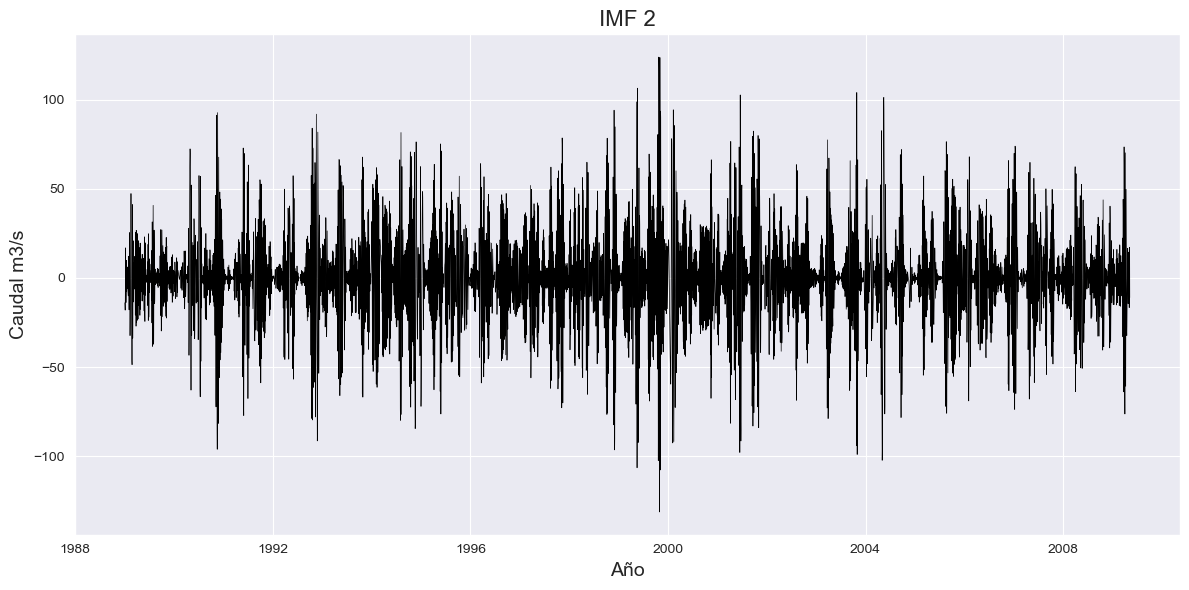

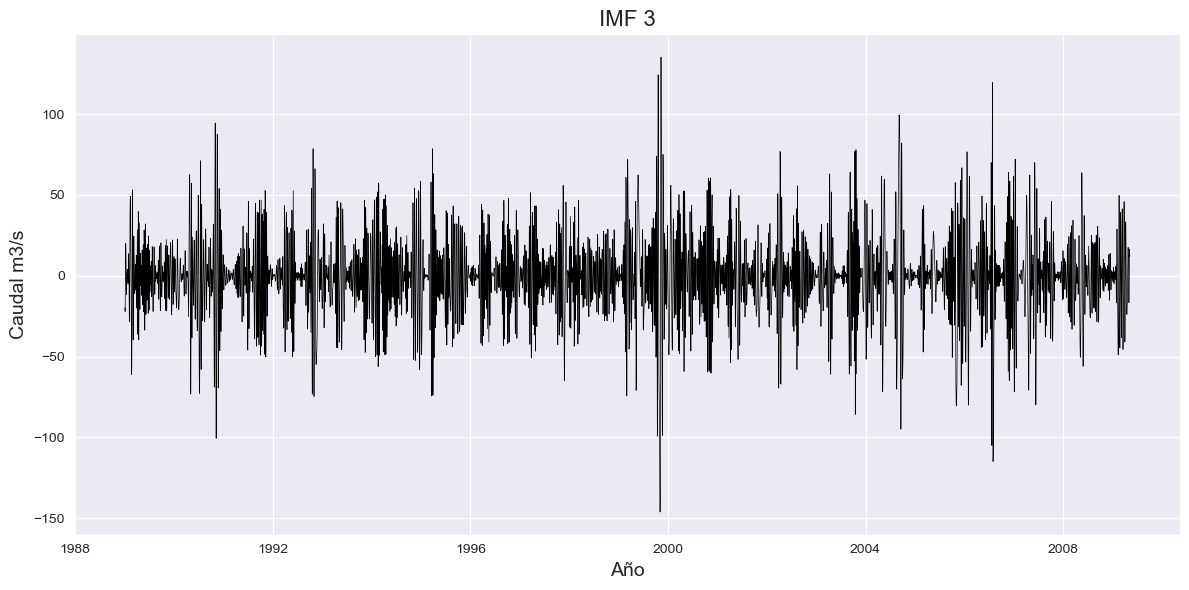

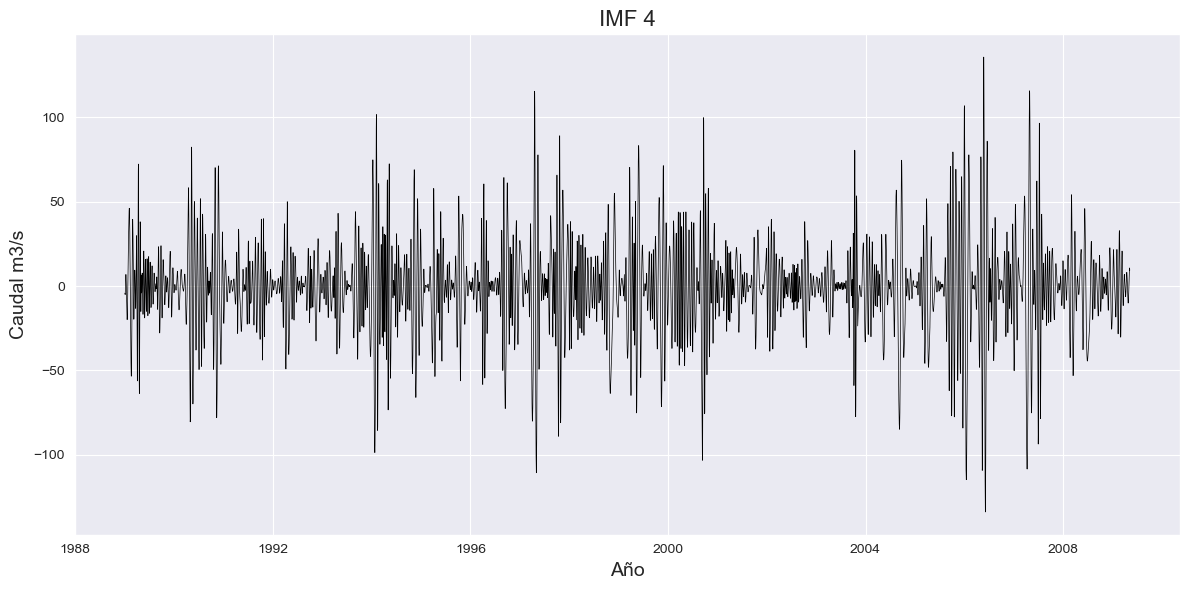

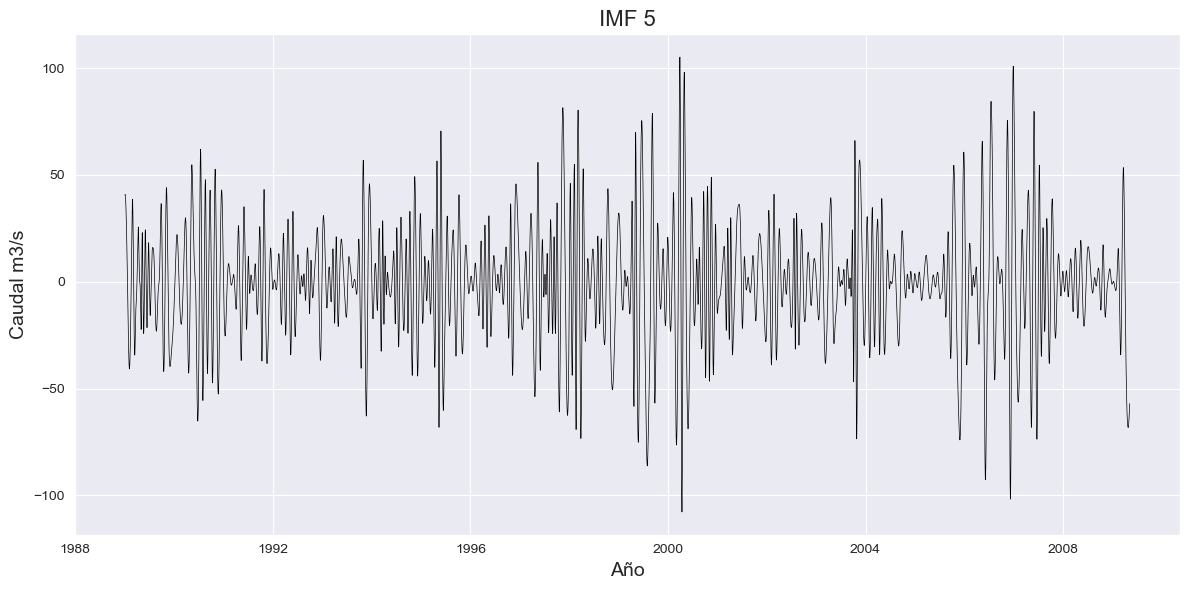

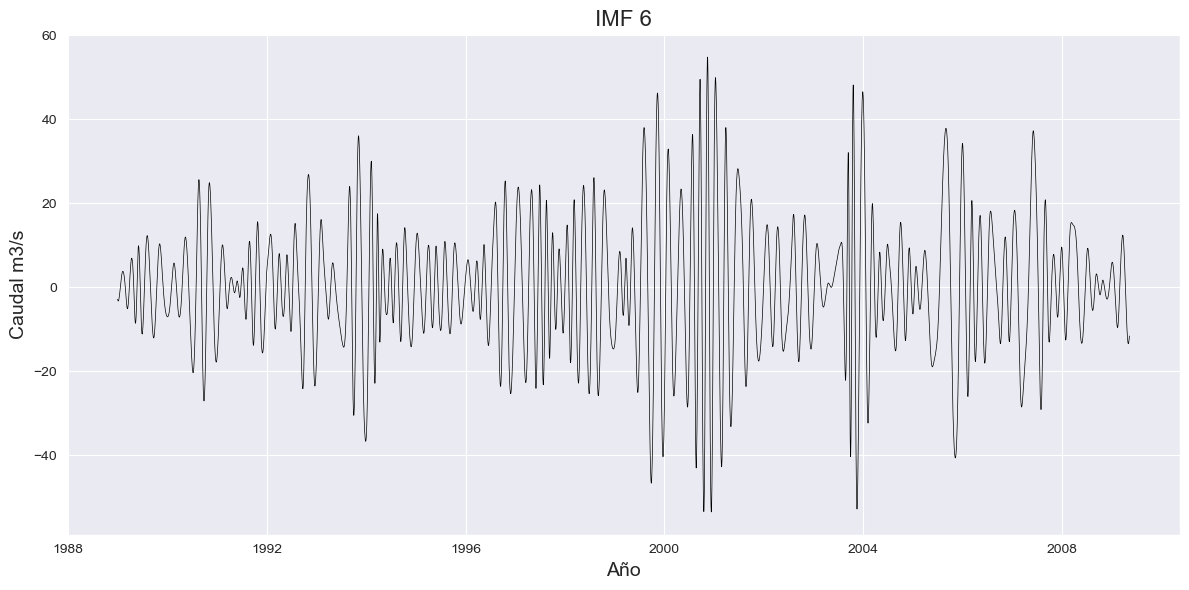

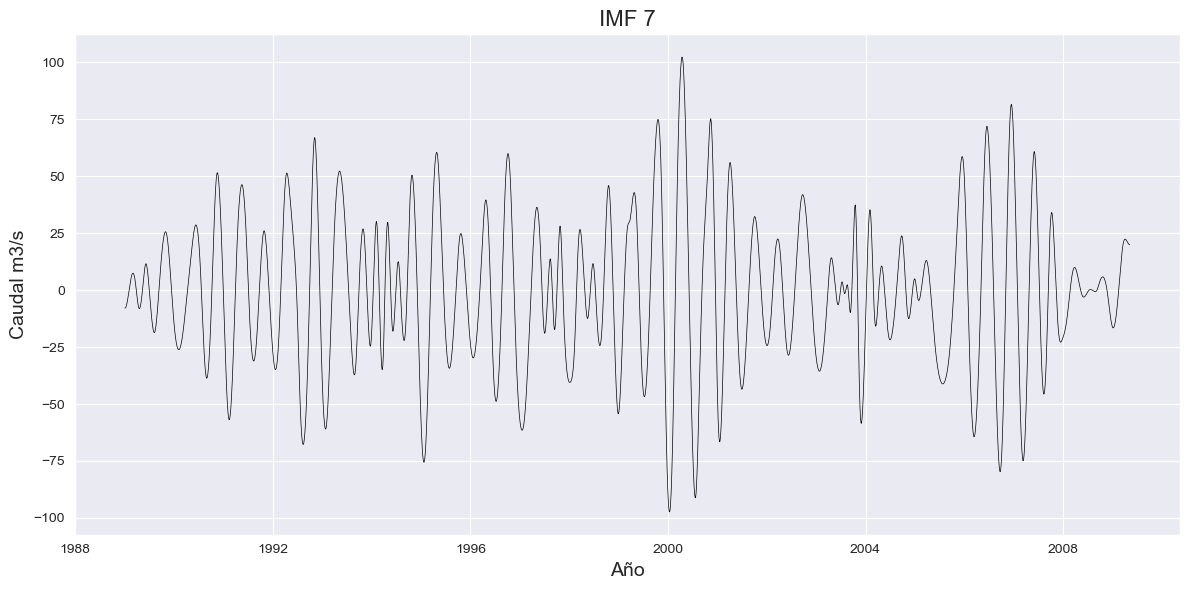

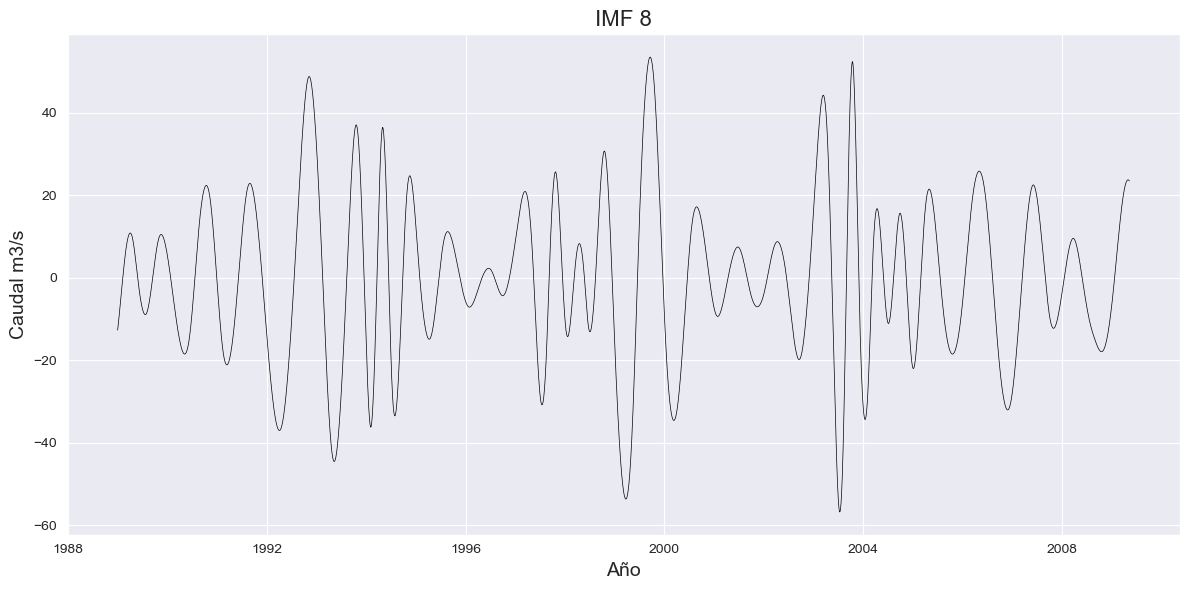

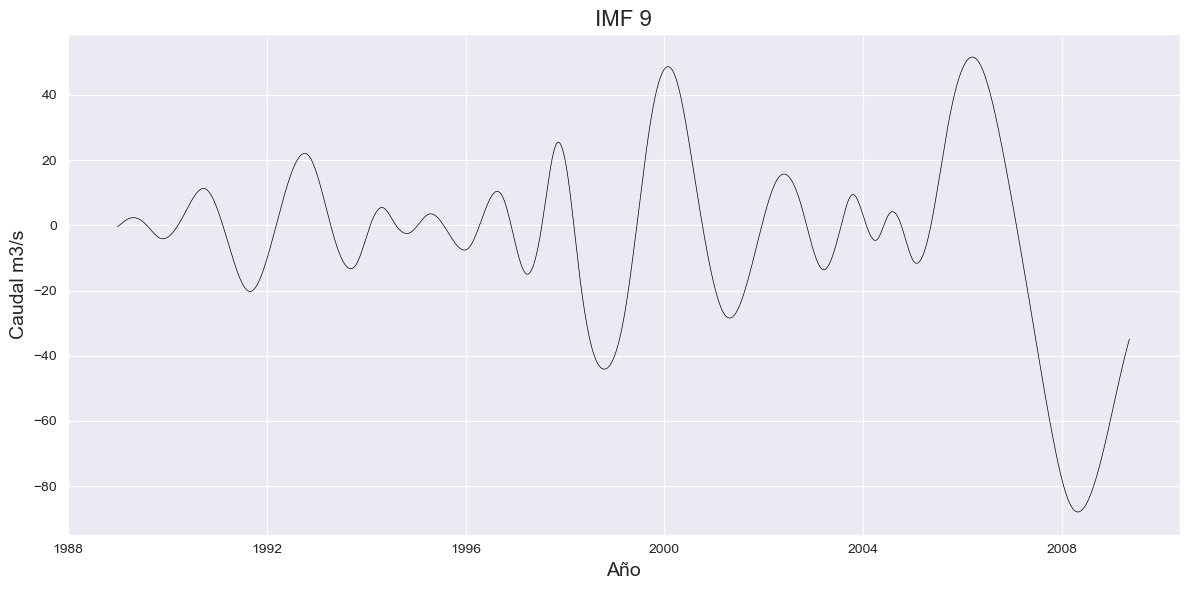

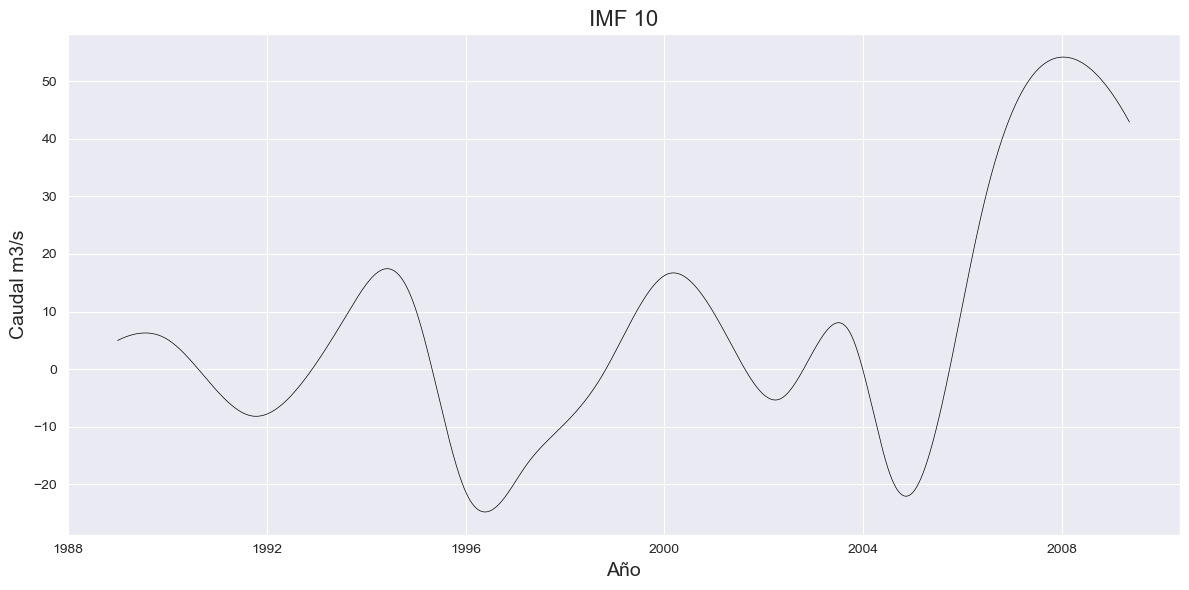

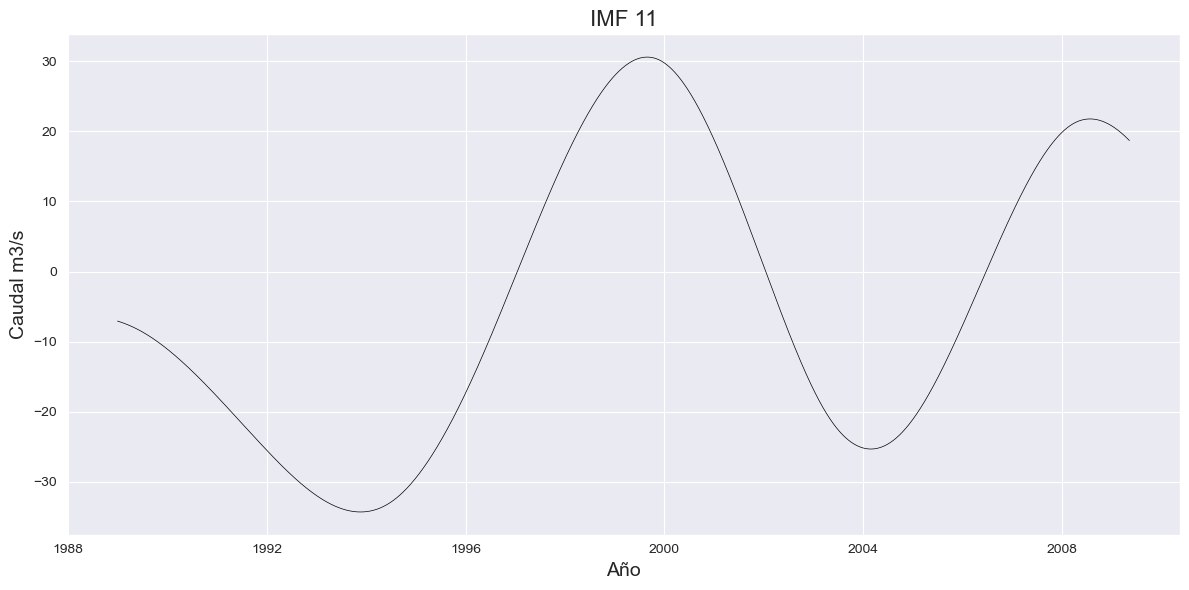

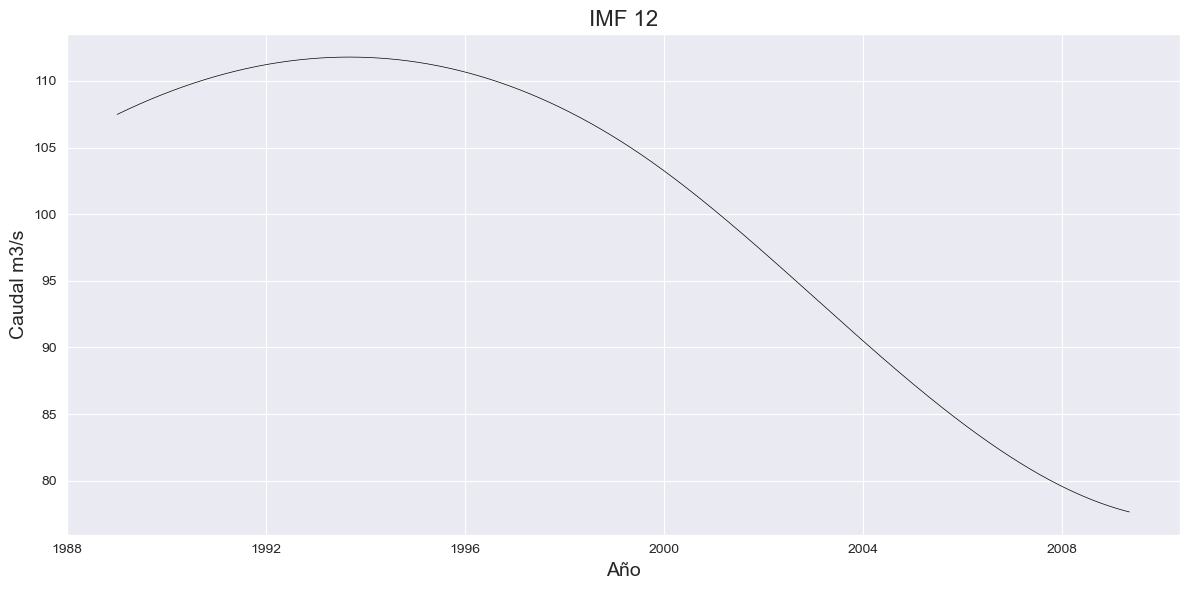

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from PyEMD import EMD
from matplotlib.dates import DateFormatter, YearLocator

# Leemos los datos desde el archivo CSV, especificando el formato de fecha
df = pd.read_csv(r'J:\My Drive\1_Maestria_en_recursos_Hidraulicos\Tercer_Semestre\Metodos_Estocasticos\Trabajos\T5_Series de Tiempo 1\SMWR_Lebrija.csv', parse_dates=['Fecha'], dayfirst=False)

# Extraemos la columna 'Caudal m3/s' y eliminamos las filas vacías
datos = df['Caudal m3/s'].dropna()

# Aplicamos el método EMD a los datos
emd = EMD()
IMFs = emd.emd(datos.values)  # Usamos .values para obtener un array de numpy

# Iteramos sobre cada IMF
for i, imf in enumerate(IMFs):
    # Creamos una nueva figura para cada IMF
    plt.figure(figsize=(12, 6))
    
    # Graficamos la IMF
    plt.plot(df['Fecha'][:len(imf)], imf, 'k-', linewidth=0.5)
    
    # Añadimos título y etiquetas para los ejes
    plt.title(f'IMF {i+1}', fontsize=16)
    plt.xlabel('Año', fontsize=14)  # Cambiamos 'Fecha' por 'Año'
    plt.ylabel('Caudal m3/s', fontsize=14)
    
    # Añadimos una cuadrícula
    plt.grid(True)
    
    # Configuramos el intervalo de los ticks en el eje x (cada 4 años)
    plt.gca().xaxis.set_major_locator(YearLocator(4))
    
    # Formateamos las etiquetas del eje x para mostrar solo el año
    date_form = DateFormatter("%Y")  # Cambiamos "%m/%d/%Y" por "%Y"
    plt.gca().xaxis.set_major_formatter(date_form)
    
    # Rotamos los ticks del eje x para evitar superposición
    plt.xticks(rotation=0)
    
    # Mostramos el gráfico
    plt.tight_layout()
    plt.show()


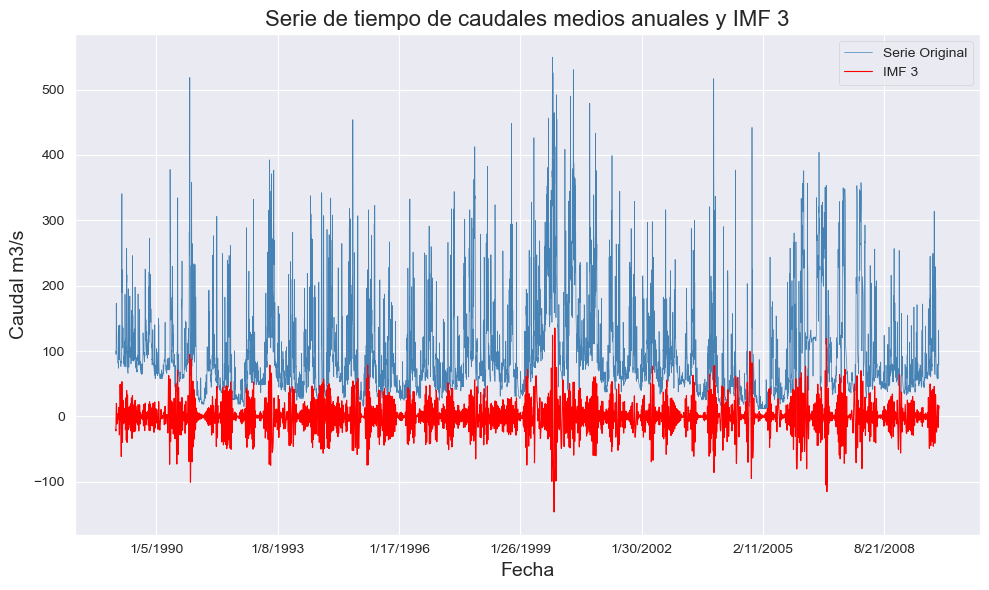

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PyEMD import EMD
from matplotlib.dates import YearLocator

# Leemos los datos desde el archivo CSV
df = pd.read_csv(r'J:\My Drive\1_Maestria_en_recursos_Hidraulicos\Tercer_Semestre\Metodos_Estocasticos\Trabajos\T5_Series de Tiempo 1\SMWR_Lebrija.csv', parse_dates=['Fecha'], dayfirst=True)
Serie_Diaria = df[['Fecha', 'Caudal m3/s']].dropna()

# Establecer el estilo del gráfico
sns.set_style("darkgrid")

# Crear el gráfico
plt.figure(figsize=(10,6))

# Graficamos la serie original
plt.plot(Serie_Diaria['Fecha'], Serie_Diaria['Caudal m3/s'], color='Steelblue', linewidth=0.5, label='Serie Original')

# Aplicamos el método EMD a los datos
emd = EMD()
IMFs = emd.emd(Serie_Diaria['Caudal m3/s'].values)  # Usamos .values para obtener un array de numpy

# Graficamos solo la tercera IMF
imf3 = IMFs[2]  # La tercera IMF
plt.plot(Serie_Diaria['Fecha'], imf3, label='IMF 3', color='red', linewidth=0.8)

# Añadir título y etiquetas para los ejes
plt.title('Serie de tiempo de caudales medios anuales y IMF 3', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Caudal m3/s', fontsize=14)

# Añadir una cuadrícula
plt.grid(True)

# Configurar el intervalo de los ticks en el eje x (cada 4 años)
plt.gca().xaxis.set_major_locator(YearLocator(3))

# Rotamos los ticks del eje x para evitar superposición
plt.xticks(rotation=0)

# Mostrar leyenda
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()



<font size="5.0"> &emsp; **i. El Histograma**

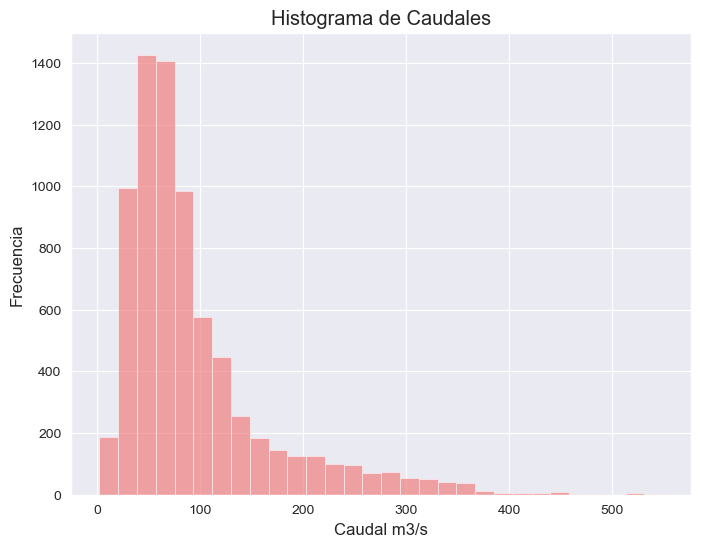

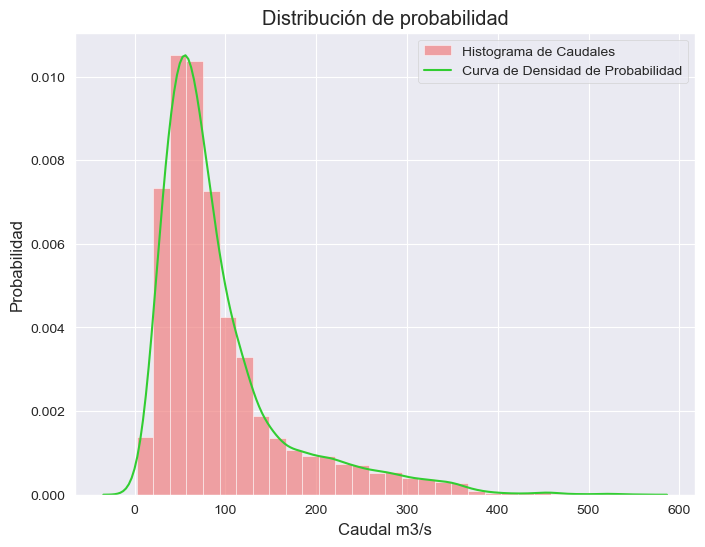

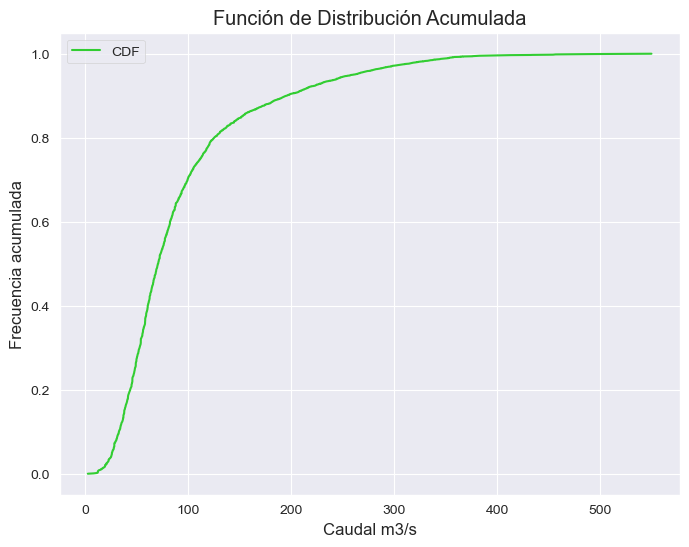

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Lee el archivo CSV
Serie_Diaria = pd.read_csv(r'J:\My Drive\1_Maestria_en_recursos_Hidraulicos\Tercer_Semestre\Metodos_Estocasticos\Trabajos\T5_Series de Tiempo 1\SMWR_Lebrija.csv')


# Asegúrate de que los datos estén en formato numérico
Serie_Diaria['Caudal m3/s'] = pd.to_numeric(Serie_Diaria['Caudal m3/s'], errors='coerce')

# Elimina las filas con valores NaN
Serie_Diaria = Serie_Diaria.dropna(subset=['Caudal m3/s'])


# Establecer el estilo del gráfico
sns.set_style("darkgrid")

# Crear el histograma de los caudales
plt.figure(figsize=(8, 6))
plt.hist(Serie_Diaria['Caudal m3/s'], bins=30, color='lightcoral', alpha=0.7, label='Histograma de Caudales')

plt.xlabel('Caudal m3/s')
plt.ylabel('Frecuencia')
plt.title('Histograma de Caudales')
plt.grid(True)

# Mostrar el histograma
plt.show()


# Crear el histograma de los caudales
plt.figure(figsize=(8, 6))
plt.hist(Serie_Diaria['Caudal m3/s'], bins=30, color='lightcoral', alpha=0.7, label='Histograma de Caudales', density=True)

# Agregar la curva de densidad de probabilidad
sns.kdeplot(Serie_Diaria['Caudal m3/s'], color='limegreen', label='Curva de Densidad de Probabilidad')

plt.xlabel('Caudal m3/s')
plt.ylabel('Probabilidad')
plt.title('Distribución de probabilidad')
plt.grid(True)
plt.legend()

# Mostrar la pdf
plt.show()

# Calcular la función de distribución acumulada
data_sorted = np.sort(Serie_Diaria['Caudal m3/s'])
p = 1. * np.arange(len(Serie_Diaria['Caudal m3/s'])) / (len(Serie_Diaria['Caudal m3/s']) - 1)

# Crear el gráfico de la CDF
plt.figure(figsize=(8, 6))
plt.plot(data_sorted, p, color='limegreen', label='CDF')
plt.xlabel('Caudal m3/s')
plt.ylabel('Frecuencia acumulada')
plt.title('Función de Distribución Acumulada')
plt.grid(True)
plt.legend()

# Mostrar el gráfico
plt.show()












<font size="5.0"> &emsp; **j. Diagrama de caja y bigotes**

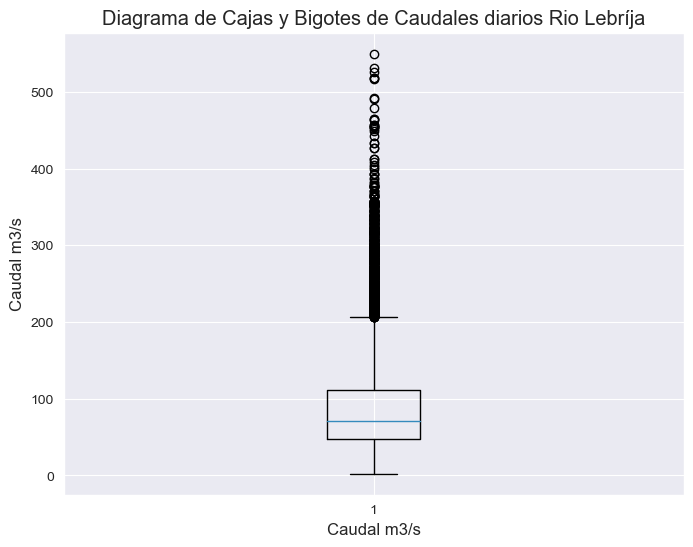

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Lee el archivo CSV
Serie_Diaria = pd.read_csv(r'J:\My Drive\1_Maestria_en_recursos_Hidraulicos\Tercer_Semestre\Metodos_Estocasticos\Trabajos\T5_Series de Tiempo 1\SMWR_Lebrija.csv')

# Asegúrate de que los datos estén en formato numérico
Serie_Diaria['Caudal m3/s'] = pd.to_numeric(Serie_Diaria['Caudal m3/s'], errors='coerce')

# Elimina las filas con valores NaN
Serie_Diaria = Serie_Diaria.dropna(subset=['Caudal m3/s'])

# Establecer el estilo del gráfico
sns.set_style("darkgrid")

# Crear el diagrama de cajas y bigotes
plt.figure(figsize=(8, 6))
plt.boxplot(Serie_Diaria['Caudal m3/s'], vert=True)
plt.xlabel('Caudal m3/s')

plt.ylabel('Caudal m3/s')
plt.title('Diagrama de Cajas y Bigotes de Caudales diarios Rio Lebríja')
plt.grid(True)

# Mostrar el diagrama de cajas y bigotes
plt.show()


<font size="5"> **4. Realice las pruebas de hipótesis para los datos de la serie de tiempo en escala diaria**

<font size="5.0"> &emsp; **a. Análisis de Saltos**

<font size="4.8"> &emsp;&emsp; <b><i>i. Prueba de Pettitt</i></b>

In [74]:
import ruptures as rpt
import numpy as np

# Asegúrate de que los datos estén en formato numérico
Serie_Diaria['Caudal m3/s'] = pd.to_numeric(Serie_Diaria['Caudal m3/s'], errors='coerce')

# Elimina las filas con valores NaN
Serie_Diaria = Serie_Diaria.dropna(subset=['Caudal m3/s'])

# Obtén los valores de la columna 'Caudal m3/s' como un array de NumPy
data = np.array(Serie_Diaria['Caudal m3/s'].tolist())

# Crea una instancia del detector de cambio de punto
model = "l2"  # modelo de costos
algo = rpt.Pelt(model=model).fit(data)

# Detecta el punto de cambio
result = algo.predict(pen=1)

# Imprime el resultado
print(f'El punto de cambio detectado está en el índice: {result[0]}')



El punto de cambio detectado está en el índice: 5


In [75]:
import numpy as np
import pyhomogeneity as hg

# Asegúrate de que los datos estén en formato numérico
Serie_Diaria['Caudal m3/s'] = pd.to_numeric(Serie_Diaria['Caudal m3/s'], errors='coerce')

# Elimina las filas con valores NaN
Serie_Diaria = Serie_Diaria.dropna(subset=['Caudal m3/s'])

# Obtén los valores de la columna 'Caudal m3/s' como un array de NumPy
data = np.array(Serie_Diaria['Caudal m3/s'].tolist())

# Realiza la prueba de Pettitt
result = hg.pettitt_test(data)

# Imprime el resultado
print(result)


Pettitt_Test(h=True, cp=5074, p=0.0, U=2684079.0, avg=mean(mu1=98.21012219156485, mu2=84.26284653343934))


<font size="4.8"> &emsp;&emsp; <b><i>ii. Prueba de Suma de Rangos</i></b>

In [76]:
import pandas as pd
import numpy as np
from scipy.stats import ranksums

# Leer el archivo CSV
Serie_Diaria = pd.read_csv('J:\\My Drive\\1_Maestria_en_recursos_Hidraulicos\\Tercer_Semestre\\Metodos_Estocasticos\\Trabajos\\T5_Series de Tiempo 1\\SMWR_Lebrija.csv')

# Asegúrate de que los datos estén en formato numérico
Serie_Diaria['Caudal m3/s'] = pd.to_numeric(Serie_Diaria['Caudal m3/s'], errors='coerce')

# Elimina las filas con valores NaN
Serie_Diaria = Serie_Diaria.dropna(subset=['Caudal m3/s'])

# Obtén los valores de la columna 'Caudal m3/s' como un array de NumPy
data = np.array(Serie_Diaria['Caudal m3/s'].tolist())

# Dividir los datos en dos conjuntos
mitad = len(data) // 2
data1 = data[:mitad]
data2 = data[mitad:]

# Realizar la prueba de suma de rangos de Wilcoxon
estadistica, p = ranksums(data1, data2)

# Imprimir la estadística de prueba y el valor p
print(f"Estadística de prueba: {estadistica}, valor p: {p}")


Estadística de prueba: -3.1491407747125466, valor p: 0.0016375129240833912


<font size="4.8"> &emsp;&emsp; <b><i>iii. Prueba de Desviaciones Acumuladas</i></b>

In [77]:
import numpy as np
import pandas as pd
from scipy.stats import ks_2samp

# Cargar los datos
data = pd.read_csv('J:\\My Drive\\1_Maestria_en_recursos_Hidraulicos\\Tercer_Semestre\\Metodos_Estocasticos\\Trabajos\\T5_Series de Tiempo 1\\SMWR_Lebrija.csv')

# Asegúrate de que los datos estén en formato numérico
data['Caudal m3/s'] = pd.to_numeric(data['Caudal m3/s'], errors='coerce')

# Elimina las filas con valores NaN
data = data.dropna(subset=['Caudal m3/s'])

# Obtén los valores de la columna 'Caudal m3/s' como un array de NumPy
data_array = np.array(data['Caudal m3/s'].tolist())

# Dividir los datos en dos conjuntos
mitad = len(data_array) // 2
data1 = data_array[:mitad]
data2 = data_array[mitad:]

# Calcular la prueba de desviaciones acumuladas de Kolmogorov-Smirnov
D, p_value = ks_2samp(data1, data2)

print("Estadístico D de la prueba de desviaciones acumuladas:", D)
print("Valor p:", p_value)


Estadístico D de la prueba de desviaciones acumuladas: 0.08234660925726588
Valor p: 2.221909830794137e-11


<font size="4.8"> &emsp;&emsp; <b><i>iv. Prueba de Kruskal-Wallis</i></b>

In [78]:
import numpy as np
import pandas as pd
from scipy.stats import kruskal

# Cargar los datos
data = pd.read_csv('J:\\My Drive\\1_Maestria_en_recursos_Hidraulicos\\Tercer_Semestre\\Metodos_Estocasticos\\Trabajos\\T5_Series de Tiempo 1\\SMWR_Lebrija.csv')

# Asegúrate de que los datos estén en formato numérico
data['Caudal m3/s'] = pd.to_numeric(data['Caudal m3/s'], errors='coerce')

# Elimina las filas con valores NaN
data = data.dropna(subset=['Caudal m3/s'])

# Obtén los valores de la columna 'Caudal m3/s' como un array de NumPy
data_array = np.array(data['Caudal m3/s'].tolist())

# Dividir los datos en tres grupos
tercio = len(data_array) // 3
data1 = data_array[:tercio]
data2 = data_array[tercio:2*tercio]
data3 = data_array[2*tercio:]

# Calcular la prueba de Kruskal-Wallis
H, p_value = kruskal(data1, data2, data3)

print("Estadístico H de la prueba de Kruskal-Wallis:", H)
print("Valor p:", p_value)


Estadístico H de la prueba de Kruskal-Wallis: 288.019837218743
Valor p: 2.866071421172492e-63


<font size="4.8"> &emsp;&emsp; <b><i>v. Prueba CUSUM</i></b>

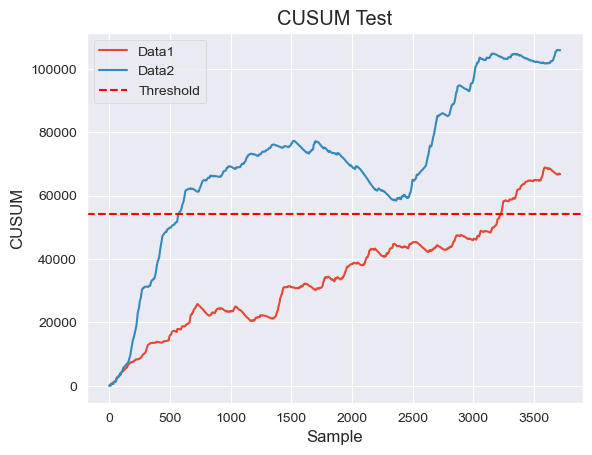

Se rechaza la hipótesis nula. Las medianas son diferentes.
Valor de prueba (T): 56223.68979159968
Umbral de decisión (h): 54149.057953024676


In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos
data = pd.read_csv('J:\\My Drive\\1_Maestria_en_recursos_Hidraulicos\\Tercer_Semestre\\Metodos_Estocasticos\\Trabajos\\T5_Series de Tiempo 1\\SMWR_Lebrija.csv')

# Asegúrate de que los datos estén en formato numérico
data['Caudal m3/s'] = pd.to_numeric(data['Caudal m3/s'], errors='coerce')

# Elimina las filas con valores NaN
data = data.dropna(subset=['Caudal m3/s'])

# Obtén los valores de la columna 'Caudal m3/s' como un array de NumPy
data_array = np.array(data['Caudal m3/s'])

def cusum_test(data1, data2, alpha=0.05):
    n1 = len(data1)
    n2 = len(data2)
    mu1 = np.median(data1)
    mu2 = np.median(data2)

    # Cálculo de las diferencias de las medianas
    delta = mu2 - mu1

    # Cálculo de las sumas acumulativas
    cusum = np.cumsum(data2 - np.median(data2) - data1 + np.median(data1))

    # Estadística de prueba
    T = np.max(np.abs(cusum))

    # Establecer el umbral de decisión
    h = np.percentile(cusum, 100 * (1 - alpha))

    # Prueba de hipótesis
    if T > h:
        return True, T, h
    else:
        return False, T, h

# Dividir la serie de tiempo en dos porciones
n = len(data_array)
mid_point = n // 2
data1 = data_array[:mid_point]
data2 = data_array[mid_point:]

# Realizar la prueba de CUSUM
result, T, h = cusum_test(data1, data2)

# Graficar las sumas acumulativas
plt.plot(np.arange(1, len(data1) + 1), np.cumsum(data1 - np.median(data1)))
plt.plot(np.arange(1, len(data2) + 1), np.cumsum(data2 - np.median(data2)))
plt.axhline(h, color='r', linestyle='--', label='Threshold')
plt.xlabel('Sample')
plt.ylabel('CUSUM')
plt.title('CUSUM Test')
plt.legend(['Data1', 'Data2', 'Threshold'])
plt.grid(True)
plt.show()

# Imprimir resultados
if result:
    print("Se rechaza la hipótesis nula. Las medianas son diferentes.")
else:
    print("No se rechaza la hipótesis nula. No hay suficiente evidencia para decir que las medianas son diferentes.")
print("Valor de prueba (T):", T)
print("Umbral de decisión (h):", h)


<font size="4.8"> &emsp;&emsp; <b><i>vi. Prueba t de Student</i></b>

In [80]:
import pandas as pd
from scipy import stats

# Cargar los datos
data = pd.read_csv('J:\\My Drive\\1_Maestria_en_recursos_Hidraulicos\\Tercer_Semestre\\Metodos_Estocasticos\\Trabajos\\T5_Series de Tiempo 1\\SMWR_Lebrija.csv')

# Asegúrate de que los datos estén en formato numérico
data['Caudal m3/s'] = pd.to_numeric(data['Caudal m3/s'], errors='coerce')

# Elimina las filas con valores NaN
data = data.dropna(subset=['Caudal m3/s'])

# Dividir los datos en dos grupos (por ejemplo, primera mitad y segunda mitad)
n = len(data)
mid_point = n // 2
grupo1 = data['Caudal m3/s'][:mid_point]
grupo2 = data['Caudal m3/s'][mid_point:]

# Realizar la prueba t de Student
t_statistic, p_value = stats.ttest_ind(grupo1, grupo2)

# Imprimir resultados
print("Estadística t:", t_statistic)
print("Valor p:", p_value)

# Interpretar resultados
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula. Hay evidencia suficiente para afirmar que hay una diferencia significativa entre las medias de los dos grupos.")
else:
    print("No se rechaza la hipótesis nula. No hay suficiente evidencia para afirmar que hay una diferencia significativa entre las medias de los dos grupos.")


Estadística t: -7.543114872300518
Valor p: 5.133433586405272e-14
Se rechaza la hipótesis nula. Hay evidencia suficiente para afirmar que hay una diferencia significativa entre las medias de los dos grupos.


<font size="4.8"> &emsp;&emsp; <b><i>vii. Prueba de la Relación de Verosimilitud de Worsley</i></b>

<font size="4.8"> &emsp;&emsp; <b><i>viii. Prueba de Siegel-Tukey</i></b>

In [81]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Cargar los datos
data = pd.read_csv('J:\\My Drive\\1_Maestria_en_recursos_Hidraulicos\\Tercer_Semestre\\Metodos_Estocasticos\\Trabajos\\T5_Series de Tiempo 1\\SMWR_Lebrija.csv')

# Asegúrate de que los datos estén en formato numérico
data['Caudal m3/s'] = pd.to_numeric(data['Caudal m3/s'], errors='coerce')

# Elimina las filas con valores NaN
data = data.dropna(subset=['Caudal m3/s'])

# Dividir los datos en dos grupos (por ejemplo, primera mitad y segunda mitad)
n = len(data)
mid_point = n // 2
grupo1 = data['Caudal m3/s'][:mid_point]
grupo2 = data['Caudal m3/s'][mid_point:]

# Aplicar la prueba de Siegel-Tukey
tukey_result = pairwise_tukeyhsd(data['Caudal m3/s'], groups=[1]*len(grupo1) + [2]*len(grupo2))

# Imprimir los resultados
print(tukey_result)




Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower   upper  reject
--------------------------------------------------
     1      2  12.7255   0.0 9.4184 16.0325   True
--------------------------------------------------


<font size="5.0"> &emsp; **b. Pruebas de hipótesis de tendencias**

<font size="4.8"> &emsp;&emsp; <b><i>i. Prueba de coeficiente de correlación ρ de Spearman</i></b>

In [82]:
import pandas as pd
import numpy as np

# Cargar los datos
data = pd.read_csv('J:\\My Drive\\1_Maestria_en_recursos_Hidraulicos\\Tercer_Semestre\\Metodos_Estocasticos\\Trabajos\\T5_Series de Tiempo 1\\SMWR_Lebrija.csv')

# Asegúrate de que los datos estén en formato numérico
data['Caudal m3/s'] = pd.to_numeric(data['Caudal m3/s'], errors='coerce')

# Elimina las filas con valores NaN
data = data.dropna(subset=['Caudal m3/s'])

# Calcula los rangos de la serie de tiempo de caudal
ranks = data['Caudal m3/s'].rank()

# Calcula las diferencias entre los rangos y los índices
differences = ranks - np.arange(len(data))

# Calcula el coeficiente de correlación de Spearman
n = len(data)
spearman_corr = 1 - (6 * np.sum(differences**2)) / (n * (n**2 - 1))

print("Coeficiente de correlación de Spearman:", spearman_corr)


Coeficiente de correlación de Spearman: -0.05687048105436565


<font size="4.8"> &emsp;&emsp; <b><i>ii. Prueba de Mann-Kendall</i></b>

In [83]:
# Importar el paquete pymannkendall
import pymannkendall as mk

# Cargar los datos
data = pd.read_csv('J:\\My Drive\\1_Maestria_en_recursos_Hidraulicos\\Tercer_Semestre\\Metodos_Estocasticos\\Trabajos\\T5_Series de Tiempo 1\\SMWR_Lebrija.csv')

# Asegúrate de que los datos estén en formato numérico
data['Caudal m3/s'] = pd.to_numeric(data['Caudal m3/s'], errors='coerce')

# Elimina las filas con valores NaN
data = data.dropna(subset=['Caudal m3/s'])

# Realizar la prueba de tendencia de Mann-Kendall en la columna 'Caudal m3/s'
result = mk.original_test(data['Caudal m3/s'])

# Imprimir el resultado
print(result)





Mann_Kendall_Test(trend='decreasing', h=True, p=4.495507683888178e-07, z=-5.046681100226584, Tau=-0.039035806853985985, s=-1077919.0, var_s=45620466650.333336, slope=-0.0011348684210526327, intercept=74.75055674342106)


<font size="4.8"> &emsp;&emsp; <b><i>iii. Prueba de Mann-Kendall modificada</i></b>

In [84]:
import pymannkendall as mk
import pandas as pd
import statsmodels.api as sm

# Cargar los datos
data = pd.read_csv('J:\\My Drive\\1_Maestria_en_recursos_Hidraulicos\\Tercer_Semestre\\Metodos_Estocasticos\\Trabajos\\T5_Series de Tiempo 1\\SMWR_Lebrija.csv')

# Asegúrate de que los datos estén en formato numérico
data['Caudal m3/s'] = pd.to_numeric(data['Caudal m3/s'], errors='coerce')

result = mk.hamed_rao_modification_test(data['Caudal m3/s'])

# Imprimir los resultados
print(result)


Modified_Mann_Kendall_Test_Hamed_Rao_Approach(trend='no trend', h=False, p=0.4457706459006374, z=-0.7624849101953228, Tau=-0.039035806853985985, s=-1077919.0, var_s=1998522038871.1453, slope=-0.0011077542799597185, intercept=74.67640025490937)


<font size="4.8"> &emsp;&emsp; <b><i>iv. Prueba de Regresión Lineal</i></b>

In [85]:
import pandas as pd
from scipy import stats

# Cargar los datos
data = pd.read_csv('J:\\My Drive\\1_Maestria_en_recursos_Hidraulicos\\Tercer_Semestre\\Metodos_Estocasticos\\Trabajos\\T5_Series de Tiempo 1\\SMWR_Lebrija.csv')

# Asegúrate de que los datos estén en formato numérico
data['Caudal m3/s'] = pd.to_numeric(data['Caudal m3/s'], errors='coerce')

# Elimina las filas con valores NaN
data = data.dropna(subset=['Caudal m3/s'])

# Calcular correlación
correlation_coefficient, p_value = stats.pearsonr(data.index, data['Caudal m3/s'])
print("Coeficiente de correlación lineal:", correlation_coefficient)

# Calcular la regresión lineal
slope, intercept, r_value, p_value, std_err = stats.linregress(data.index, data['Caudal m3/s'])
print("Pendiente (m):", slope)
print("Intercepto (b):", intercept)
print("Coeficiente de determinación (r^2):", r_value**2)



Coeficiente de correlación lineal: 0.01457845130591184
Pendiente (m): 0.0004844560611883372
Intercepto (b): 91.96214238549807
Coeficiente de determinación (r^2): 0.00021253124247884325


<font size="5.0"> &emsp; **c. Pruebas de hipótesis de cambio de distribución**

<font size="4.8"> &emsp;&emsp; <b><i>i. Prueba de Kolmogorov-Smirnov</i></b>

In [86]:
import pandas as pd
from scipy.stats import kstest

# Cargar los datos
data = pd.read_csv('J:\\My Drive\\1_Maestria_en_recursos_Hidraulicos\\Tercer_Semestre\\Metodos_Estocasticos\\Trabajos\\T5_Series de Tiempo 1\\SMWR_Lebrija.csv')

# Asegúrate de que los datos estén en formato numérico
data['Caudal m3/s'] = pd.to_numeric(data['Caudal m3/s'], errors='coerce')

# Elimina las filas con valores NaN
data = data.dropna(subset=['Caudal m3/s'])

# Dividir los datos en dos grupos (por ejemplo, primera mitad y segunda mitad)
n = len(data)
mid_point = n // 2
grupo1 = data['Caudal m3/s'][:mid_point]
grupo2 = data['Caudal m3/s'][mid_point:]

# Realizar la prueba de Kolmogorov-Smirnov
ks_statistic, p_value = kstest(grupo1, grupo2)

# Imprimir los resultados
print("Estadístico de prueba KS:", ks_statistic)
print("Valor p:", p_value)

# Realizar la prueba de hipótesis
alpha = 0.05  # Nivel de significancia

if p_value < alpha:
    print("Se rechaza la hipótesis nula: las muestras no provienen de la misma distribución.")
else:
    print("No se puede rechazar la hipótesis nula: no hay suficiente evidencia para afirmar que las muestras provienen de distribuciones diferentes.")

Estadístico de prueba KS: 0.08234660925726588
Valor p: 2.221909830794137e-11
Se rechaza la hipótesis nula: las muestras no provienen de la misma distribución.


<font size="4.8"> &emsp;&emsp; <b><i>ii. Prueba de Wald-Wolfowitz</i></b>

In [87]:
import pandas as pd
import numpy as np
from scipy.stats import norm

def discretize_data(data, threshold):
    """
    Discretiza los datos en dos categorías según un umbral.

    Args:
    data: Lista o array de datos numéricos.
    threshold: Valor de umbral para la discretización.

    Returns:
    Lista de datos discretizados (0 para valores menores o iguales al umbral, 1 para valores mayores al umbral).
    """
    return [0 if x <= threshold else 1 for x in data]

def wald_wolfowitz_test(data1, data2):
    """
    Realiza la prueba de Wald-Wolfowitz para verificar si hay aleatoriedad entre dos secuencias binarias.

    Args:
    data1: Lista o array de datos binarios (0 o 1).
    data2: Lista o array de datos binarios (0 o 1).

    Returns:
    Estadístico de prueba WW y valor p.
    """
    runs1 = calculate_runs(data1)
    runs2 = calculate_runs(data2)

    n1 = len(runs1)
    n2 = len(runs2)
    n = n1 + n2

    # Calcular el estadístico de prueba WW
    WW = (2 * n1 * n2) / (n1 + n2) + 1

    # Calcular el valor p
    p_value = 2 * (1 - norm.cdf(abs(WW - 1) / np.sqrt((2 * n1 * n2 * (2 * n1 * n2 - n)) / (n ** 2 * (n - 1)))))

    return WW, p_value

def calculate_runs(data):
    """
    Calcula las corridas (runs) en una secuencia binaria.

    Args:
    data: Lista o array de datos binarios (0 o 1).

    Returns:
    Lista de corridas.
    """
    runs = []
    current_run = 1
    for i in range(1, len(data)):
        if data[i] != data[i - 1]:
            runs.append(current_run)
            current_run = 1
        else:
            current_run += 1
    runs.append(current_run)
    return runs

# Cargar los datos
data = pd.read_csv('J:\\My Drive\\1_Maestria_en_recursos_Hidraulicos\\Tercer_Semestre\\Metodos_Estocasticos\\Trabajos\\T5_Series de Tiempo 1\\SMWR_Lebrija.csv')

# Asegúrate de que los datos estén en formato numérico
data['Caudal m3/s'] = pd.to_numeric(data['Caudal m3/s'], errors='coerce')

# Elimina las filas con valores NaN
data = data.dropna(subset=['Caudal m3/s'])

# Dividir los datos en dos grupos (por ejemplo, primera mitad y segunda mitad)
n = len(data)
mid_point = n // 2
grupo1 = data['Caudal m3/s'][:mid_point]
grupo2 = data['Caudal m3/s'][mid_point:]

# Discretizar los datos
threshold = grupo1.mean()  # Por ejemplo, usar la media de la primera mitad como umbral
discretized_grupo1 = discretize_data(grupo1, threshold)
discretized_grupo2 = discretize_data(grupo2, threshold)

# Realizar la prueba de Wald-Wolfowitz
WW_statistic, p_value = wald_wolfowitz_test(discretized_grupo1, discretized_grupo2)

print("Estadístico de prueba WW:", WW_statistic)
print("Valor p:", p_value)

# Realizar la prueba de hipótesis
alpha = 0.05  # Nivel de significancia
n_total = len(data)
critical_value = 1.96 / np.sqrt(n_total)  # Valor crítico para un nivel de confianza del 95%

if abs(WW_statistic - 1) > critical_value:
    print("Se rechaza la hipótesis nula: las secuencias no son aleatorias.")
else:
    print("No se puede rechazar la hipótesis nula: las secuencias son aleatorias.")

Estadístico de prueba WW: 475.17345872518285
Valor p: 0.0
Se rechaza la hipótesis nula: las secuencias no son aleatorias.


<font size="4.8"> &emsp;&emsp; <b><i>iii. Prueba de Kruskal-Wallis</i></b>

In [88]:
import pandas as pd
from scipy.stats import kruskal

# Cargar los datos
data = pd.read_csv('J:\\My Drive\\1_Maestria_en_recursos_Hidraulicos\\Tercer_Semestre\\Metodos_Estocasticos\\Trabajos\\T5_Series de Tiempo 1\\SMWR_Lebrija.csv')

# Asegúrate de que los datos estén en formato numérico
data['Caudal m3/s'] = pd.to_numeric(data['Caudal m3/s'], errors='coerce')

# Elimina las filas con valores NaN
data = data.dropna(subset=['Caudal m3/s'])

# Dividir los datos en dos grupos (por ejemplo, primera mitad y segunda mitad)
n = len(data)
mid_point = n // 2
grupo1 = data['Caudal m3/s'][:mid_point]
grupo2 = data['Caudal m3/s'][mid_point:]

# Realizar la prueba de Kruskal-Wallis
statistic, p_value = kruskal(grupo1, grupo2)

print("Estadístico de prueba de Kruskal-Wallis:", statistic)
print("Valor p:", p_value)

# Realizar la prueba de hipótesis
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: hay diferencias significativas entre las medianas de los dos grupos.")
else:
    print("No se puede rechazar la hipótesis nula: no hay suficiente evidencia para afirmar que hay diferencias significativas entre las medianas de los dos grupos.")


Estadístico de prueba de Kruskal-Wallis: 9.91714212640975
Valor p: 0.001637464428839591
Se rechaza la hipótesis nula: hay diferencias significativas entre las medianas de los dos grupos.


<font size="4.8"> &emsp;&emsp; <b><i>iv. Prueba de Terry</i></b>

In [89]:
import numpy as np
import pandas as pd

def prueba_terry(datos):
    n = len(datos)
    datos_ordenados = np.sort(datos)
    diferencias = np.abs(np.diff(datos_ordenados))
    max_diferencia = np.max(diferencias)
    estadistica_prueba = (n - 1) * max_diferencia
    return estadistica_prueba

# Serie diaria
datos = Serie_Diaria['Caudal m3/s'].values
valor_critico = 3.84
estadistica_prueba = prueba_terry(datos)

if estadistica_prueba > valor_critico:
    print("Rechazamos la hipótesis nula: no hay cambio en la media.")
else:
    print("Aceptamos la hipótesis nula: no hay cambio en la media.")

Rechazamos la hipótesis nula: no hay cambio en la media.


<font size="5.0"> &emsp; **d. Pruebas de hipótesis de normalidad**

<font size="4.8"> &emsp;&emsp; <b><i>i. Prueba de Chi Cuadrado</i></b>

In [90]:
import pandas as pd
import scipy.stats as stats

# Cargar los datos
data = pd.read_csv('J:\\My Drive\\1_Maestria_en_recursos_Hidraulicos\\Tercer_Semestre\\Metodos_Estocasticos\\Trabajos\\T5_Series de Tiempo 1\\SMWR_Lebrija.csv')

# Asegurarse de que los datos estén en formato numérico
data['Caudal m3/s'] = pd.to_numeric(data['Caudal m3/s'], errors='coerce')

# Eliminar cualquier fila con valores faltantes
data = data.dropna()

# Realizar la prueba Chi-Cuadrado de independencia
chi2, p = stats.chisquare(data['Caudal m3/s'])

# Imprimir los resultados
print(f"Estadístico Chi-Cuadrado: {chi2}")
print(f"Valor p: {p}")

# Realizar la prueba de hipótesis
alpha = 0.05
if p > alpha:
    print('No se rechaza la hipótesis nula (los datos siguen una distribución normal).')
else:
    print('Se rechaza la hipótesis nula (los datos no siguen una distribución normal).')





Estadístico Chi-Cuadrado: 422144.08120640134
Valor p: 0.0
Se rechaza la hipótesis nula (los datos no siguen una distribución normal).


<font size="4.8"> &emsp;&emsp; <b><i>ii. Prueba de Kolmogorov-Smirnov</i></b>

In [91]:
from scipy.stats import kstest

# Prueba de Kolmogorov-Smirnov
ks_stat, p_val_ks = kstest(Serie_Diaria['Caudal m3/s'], 'norm', args=(media_redondeada, varianza_redondeada))

print("Estadística de Kolmogorov-Smirnov:", ks_stat)
print("Valor p:", p_val_ks)

print("Prueba de Kolmogorov-Smirnov:")
print("H0: Los datos siguen una distribución normal")
print("H1: Los datos no siguen una distribución normal")

if p_val_ks < 0.05:
    print("Resultado: Se rechaza la hipótesis nula")
else:
    print("Resultado: No se rechaza la hipótesis nula")

Estadística de Kolmogorov-Smirnov: 0.493150346556274
Valor p: 0.0
Prueba de Kolmogorov-Smirnov:
H0: Los datos siguen una distribución normal
H1: Los datos no siguen una distribución normal
Resultado: Se rechaza la hipótesis nula


<font size="4.8"> &emsp;&emsp; <b><i>iii. Prueba de Anderson-Darling</i></b>

In [92]:
from scipy.stats import anderson

# Prueba de Anderson-Darling
ad_stat, critical_values, significance_level = anderson(Serie_Diaria['Caudal m3/s'], dist='norm')

print("Estadística de Anderson-Darling:", ad_stat)
print("Niveles críticos:", critical_values)
print("Niveles de significancia:", significance_level)

print("Prueba de Anderson-Darling:")
print("H0: Los datos siguen una distribución normal")
print("H1: Los datos no siguen una distribución normal")

if ad_stat > critical_values[2]:
    print("Resultado: Se rechaza la hipótesis nula")
else:
    print("Resultado: No se rechaza la hipótesis nula")


Estadística de Anderson-Darling: 477.40108576773855
Niveles críticos: [0.576 0.656 0.787 0.918 1.091]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
Prueba de Anderson-Darling:
H0: Los datos siguen una distribución normal
H1: Los datos no siguen una distribución normal
Resultado: Se rechaza la hipótesis nula


<font size="5.0"> &emsp; **e. Pruebas de hipótesis de aleatoriedad e independencia**

<font size="4.8"> &emsp;&emsp; <b><i>i. Prueba de cruces de Mediana</i></b>

In [93]:
import pandas as pd

# Cargar los datos
data = pd.read_csv('J:\\My Drive\\1_Maestria_en_recursos_Hidraulicos\\Tercer_Semestre\\Metodos_Estocasticos\\Trabajos\\T5_Series de Tiempo 1\\SMWR_Lebrija.csv')

# Asegurarse de que los datos estén en formato numérico
data['Caudal m3/s'] = pd.to_numeric(data['Caudal m3/s'], errors='coerce')

# Calcular la mediana de los datos
median = data['Caudal m3/s'].median()

# Inicializar el contador de cruces de mediana
crosses = 0

# Iterar sobre los datos para contar los cruces de mediana
for i in range(1, len(data)):
    if (data['Caudal m3/s'][i - 1] - median) * (data['Caudal m3/s'][i] - median) < 0:
        crosses += 1

# Imprimir el número de cruces de mediana
print("Número de cruces de mediana:", crosses)


Número de cruces de mediana: 928


<font size="4.8"> &emsp;&emsp; <b><i>ii. Prueba de puntos de cambio</i></b>

In [94]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

# Cargar los datos
data = pd.read_csv('J:\\My Drive\\1_Maestria_en_recursos_Hidraulicos\\Tercer_Semestre\\Metodos_Estocasticos\\Trabajos\\T5_Series de Tiempo 1\\SMWR_Lebrija.csv')

# Asegurarse de que los datos estén en formato numérico
data['Caudal m3/s'] = pd.to_numeric(data['Caudal m3/s'], errors='coerce')

# Eliminar cualquier fila con valores faltantes
data = data.dropna()

# Definir una función para calcular el cambio absoluto
def absolute_change(data, i):
    return abs(data.iloc[i] - data.iloc[i-1])

# Definir un umbral para considerar un cambio como significativo
threshold = 0.1  # Modifica este valor según tus necesidades

# Inicializar una lista para almacenar los índices de los puntos de cambio
change_points = []

# Iterar sobre los datos para identificar los puntos de cambio
for i in range(1, len(data)):
    change = absolute_change(data['Caudal m3/s'], i)
    if change > threshold:
        change_points.append(i)

# Imprimir los índices de los puntos de cambio
print("Puntos de cambio encontrados en los índices:", change_points)

# Separar los datos en dos grupos antes y después del punto de cambio
change_groups = []
for i in range(len(change_points)):
    if i == 0:
        change_groups.append(data.iloc[:change_points[i]])
    else:
        change_groups.append(data.iloc[change_points[i-1]:change_points[i]])

# Realizar una prueba de hipótesis para comparar las medias de los dos grupos
significant_changes = []
for group in change_groups:
    before_change = group.iloc[:-1]['Caudal m3/s']
    after_change = group.iloc[1:]['Caudal m3/s']
    t_stat, p_val = ttest_ind(before_change, after_change)
    if p_val < 0.05:  # Nivel de significancia del 5%
        significant_changes.append(group)

# Imprimir los resultados de los puntos de cambio significativos
print("Puntos de cambio significativos encontrados:", len(significant_changes))



Puntos de cambio encontrados en los índices: [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 20, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 188, 189, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 209, 210, 211, 212, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 22

c:\Users\USER\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:7030: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df
c:\Users\USER\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


Puntos de cambio significativos encontrados: 0


<font size="4.8"> &emsp;&emsp; <b><i>iii. Prueba de diferencia de rangos</i></b>

In [95]:
import pandas as pd
from scipy.stats import ranksums


# Realizar la prueba de Mann-Whitney U
u_statistic, p_value = stats.mannwhitneyu(grupo1, grupo2)

print(f"U-statistic: {u_statistic}")
print(f"P-value: {p_value}")

# Realizar la prueba de Wilcoxon Signed-Rank
w_statistic, p_value = stats.wilcoxon(grupo1, grupo2)

print(f"W-statistic: {w_statistic}")
print(f"P-value: {p_value}")

U-statistic: 6613082.5
P-value: 0.0016374947236157311
W-statistic: 3036629.0
P-value: 1.921719668679667e-10


<font size="4.8"> &emsp;&emsp; <b><i>iv. Prueba de autocorrelación</i></b>

In [96]:
import pandas as pd

# Cargar los datos
data = pd.read_csv('J:\\My Drive\\1_Maestria_en_recursos_Hidraulicos\\Tercer_Semestre\\Metodos_Estocasticos\\Trabajos\\T5_Series de Tiempo 1\\SMWR_Lebrija.csv')

# Asegurarse de que los datos estén en formato numérico
data['Caudal m3/s'] = pd.to_numeric(data['Caudal m3/s'], errors='coerce')

# Eliminar cualquier fila con valores faltantes
data = data.dropna()

# Calcular la autocorrelación de primer orden
autocorr_1 = data['Caudal m3/s'].autocorr()

# Imprimir el resultado
print("Autocorrelación de primer orden:", autocorr_1)


Autocorrelación de primer orden: 0.8103234864062762


<font size="4.8"> &emsp;&emsp; <b><i>v. Prueba de autocorrelación de Barlett</i></b>

In [97]:
import pandas as pd
import numpy as np
from scipy import stats

# Cargar los datos
data = pd.read_csv('J:\\My Drive\\1_Maestria_en_recursos_Hidraulicos\\Tercer_Semestre\\Metodos_Estocasticos\\Trabajos\\T5_Series de Tiempo 1\\SMWR_Lebrija.csv')

# Asegurarse de que los datos estén en formato numérico
data['Caudal m3/s'] = pd.to_numeric(data['Caudal m3/s'], errors='coerce')

# Eliminar cualquier fila con valores faltantes
data = data.dropna()

# Calcular la autocorrelación
autocorr = data['Caudal m3/s'].autocorr()

# Calcular el estadístico de Bartlett
bartlett_stat, bartlett_p_value = stats.bartlett(data['Caudal m3/s'], data['Caudal m3/s'].shift())

# Imprimir los resultados
print(f"Autocorrelación: {autocorr}")
print(f"Estadístico de Bartlett: {bartlett_stat}")
print(f"Valor p de Bartlett: {bartlett_p_value}")



Autocorrelación: 0.8103234864062762
Estadístico de Bartlett: 3.090012066030486e-05
Valor p de Bartlett: 0.9955647519614121


<font size="4.8"> &emsp;&emsp; <b><i>vi. Prueba de rachas</i></b>

In [98]:
import pandas as pd
from itertools import groupby

# Cargar los datos
data = pd.read_csv('J:\\My Drive\\1_Maestria_en_recursos_Hidraulicos\\Tercer_Semestre\\Metodos_Estocasticos\\Trabajos\\T5_Series de Tiempo 1\\SMWR_Lebrija.csv')

# Asegurarse de que los datos estén en formato numérico
data['Caudal m3/s'] = pd.to_numeric(data['Caudal m3/s'], errors='coerce')

# Eliminar cualquier fila con valores faltantes
data = data.dropna()

# Calcular las rachas
rachas = [1 if data['Caudal m3/s'].iloc[0] > data['Caudal m3/s'].iloc[1] else -1]
for i in range(1, len(data) - 1):
    if data['Caudal m3/s'].iloc[i] > data['Caudal m3/s'].iloc[i - 1]:
        rachas.append(1)
    else:
        rachas.append(-1)

# Contar el número de rachas
num_rachas = sum(1 for _ in (group for group in (list(group) for _, group in groupby(rachas)) if len(group) > 1))

# Calcular el estadístico de la prueba de rachas
n = len(data)
mean_rachas = (2 * n - 1) / 3
std_dev_rachas = (16 * n - 29) / 90
z_score = (num_rachas - mean_rachas) / std_dev_rachas

# Imprimir los resultados
print("Número de rachas:", num_rachas)
print("Estadístico de la prueba de rachas (Z-score):", z_score)



Número de rachas: 1816
Estadístico de la prueba de rachas (Z-score): -2.3758653466012802


<font size="4.8"> &emsp;&emsp; <b><i>vii. Prueba de von Neumann</i></b>

In [99]:
import pandas as pd

# Cargar los datos
data = pd.read_csv('J:\\My Drive\\1_Maestria_en_recursos_Hidraulicos\\Tercer_Semestre\\Metodos_Estocasticos\\Trabajos\\T5_Series de Tiempo 1\\SMWR_Lebrija.csv')

# Asegurarse de que los datos estén en formato numérico
data['Caudal m3/s'] = pd.to_numeric(data['Caudal m3/s'], errors='coerce')

# Eliminar cualquier fila con valores faltantes
data = data.dropna()

# Convertir la columna de datos en una lista
sequence = data['Caudal m3/s'].tolist()

# Contar la cantidad de pares adyacentes en la secuencia
num_adjacent_pairs = sum(1 for i in range(len(sequence) - 1) if sequence[i] == sequence[i + 1])

# Calcular la cantidad esperada de pares adyacentes bajo la hipótesis de aleatoriedad
n = len(sequence)
expected_adjacent_pairs = (n - 1) / 3

# Realizar la prueba de hipótesis de Von Neumann
if num_adjacent_pairs <= expected_adjacent_pairs:
    print("La secuencia parece ser aleatoria e independiente según la prueba de Von Neumann.")
else:
    print("La secuencia no parece ser aleatoria e independiente según la prueba de Von Neumann.")


La secuencia parece ser aleatoria e independiente según la prueba de Von Neumann.


<font size="5"> *5. El análisis del flujo en el rio Lebrija a partir los cálculos realizados se entregará en un PDF*